
<div style="background:#4C4A59;width:900px;margin:auto;border-radius:8px;padding:8px">
    <h1 style="color:#DBF227;text-align:center;">PowerCo_EDA</h1>
</div>

<h2>table contain</h2>
<ul>
    <li><a href="#uni_analysis">Univariate Analysis</a></li>
        <ul>
            <li><a href='#target'>Target Columns</li>
            <li><a href='#cat'>Category Columns</li>
            <li><a href='#num'>numerical Columns</li>
        </ul>
    <li><a href="#bi_analysis">Bivariate Analysis</a></li>
        <ul>
            <li><a href='#client_life'>client life</li>
            <li><a href='#Consumption'>Consumption</li>
            <li><a href='#Forecast'>Forecast</li>
            <li><a href='#power'>Subscribed power</li>
            <li><a href='#Margins'>Margins</li>
            <li><a href='#anther'>anther columns</li>
        </ul>
    <li><a href="#Mult_analysis"> Multivariate Analysis</a></li>
</ul>

<a id='intro'></a>


<div style="background:#4C4A59;width:900px;margin:auto;border-radius:8px;padding:8px">
    <h1 style="color:#DBF227;text-align:center;">Import Libraries</h1>
</div>

In [ ]:
!pip install plotly-express
!pip install klib
!pip install dash
!pip install dython


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly_express as px
import klib
from dash import dcc,html ,Input,Output ,Dash
import warnings
warnings.filterwarnings('ignore')
from plotly.subplots import make_subplots
from dython.nominal import associations
from datetime import datetime


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
#load the data
client=pd.read_csv('/content/drive/MyDrive/PowerCo_project/data/external/client_data (1).csv')
price=pd.read_csv('/content/drive/MyDrive/PowerCo_project/data/external/price_data (1).csv')

In [6]:
client.head()

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,t,0.00,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,1
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,...,f,0.00,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800,0
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,...,f,0.00,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856,0
3,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,...,f,0.00,30.22,30.22,1,25.46,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.200,0
4,149d57cf92fc41cf94415803a877cb4b,MISSING,4425,0,526,2010-01-13,2016-03-07,2010-01-13,2015-03-09,445.75,...,f,52.32,44.91,44.91,1,47.98,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,19.800,0


In [7]:
client['date_activ']=pd.to_datetime(client['date_activ'])
client['date_end']=pd.to_datetime(client['date_end'])
client['date_modif_prod']=pd.to_datetime(client['date_modif_prod'])
client['date_renewal']=pd.to_datetime(client['date_renewal'])

<a id='uni_analysis'>
<div style="background:#4C4A59;width:900px;margin:auto;border-radius:8px;padding:8px">
    <h1 style="color:#DBF227;text-align:center;">1-Univariate Analysis</h1>
</div>

<a id='target'>

<div style="background:#8C4B45;width:500px;margin:auto;border-radius:8px;padding:5px">
    <h2 style="color:#F2F2F2;text-align:center;">1-Target Columns</h2>
</div>

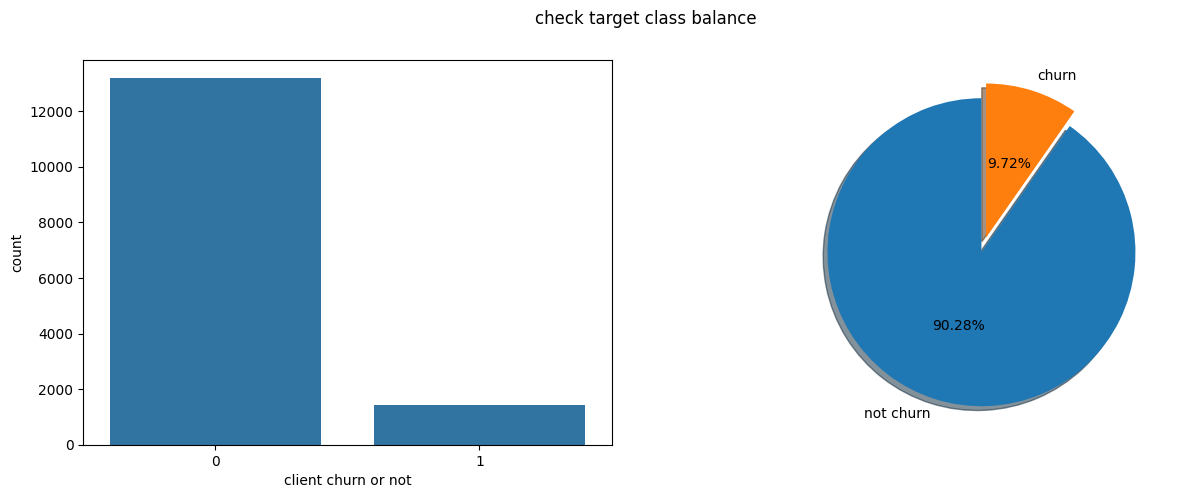

In [8]:
#check the target balance
plt.rcParams['figure.figsize']=(15,5)
#plot a bar plot
plt.subplot(1,2,1)
sns.countplot(client,x='churn')
plt.xlabel('client churn or not')


#make pie plot
plt.subplot(122)
client['churn'].value_counts().plot(kind='pie',explode=[0.0,0.1],autopct='%0.2f%%',
                                   startangle=90,labels=['not churn','churn'],
                                   shadow=True,pctdistance=0.5)
plt.axis('off')
plt.suptitle('check target class balance')
plt.show()


<Axes: title={'center': 'Feature-correlation (pearson)'}>

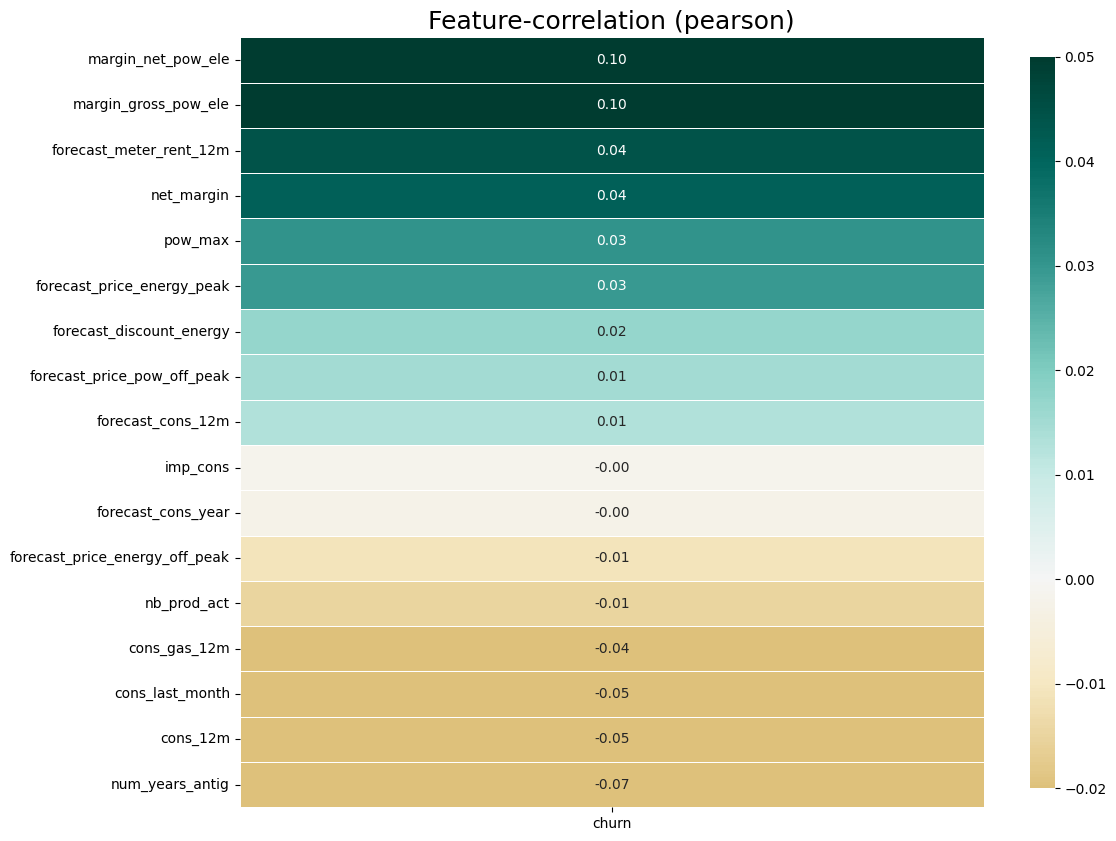

In [9]:
#check the target corr with the feature
klib.corr_plot(client,target='churn')

<div style="background: #1D1E26; width: 800px; color: #D9B4B7; border-radius: 10px; margin: auto; padding: 20px;">
    <h3 style="text-align:center;color:#15BFAE">Summary</h3>
    <ul>
        <li>The target feature <code>churn</code> in your dataset is imbalanced. This imbalance might introduce challenges during modeling and evaluation, requiring careful consideration of sampling strategies and evaluation metrics.</li>
        <li><b>Weak Correlation with Consumption Data:</b> The columns related to consumption <code>(cons_12m, cons_gas_12m, cons_last_month)</code> exhibit weak negative correlations with <code>churn</code>. This suggests that there is a slight tendency for customers with lower historical consumption to churn, but the correlation is not very strong.</li>
        <li>Columns related to forecasted values <code>(forecast_cons_12m, forecast_cons_year, forecast_discount_energy, forecast_meter_rent_12m, forecast_price_energy_off_peak, forecast_price_energy_peak, forecast_price_pow_off_peak)</code> show either very weak or negligible correlations with <code>churn</code>. This indicates that forecasted values may not have a significant impact on churn behavior.</li>
        <li><b>Margin and Net Margin Correlation:</b> Both <code>margin_gross_pow_ele</code> and <code>margin_net_pow_ele</code> exhibit a moderate positive correlation with <code>churn</code>. This suggests that customers with higher gross and net margins are slightly more likely to churn.</li>
        <li>The columns <code>nb_prod_act</code> (number of active products) and <code>pow_max</code> (maximum power) show weak correlations with <code>churn</code>, indicating that these factors may not strongly influence churn behavior.</li>
    </ul>
</div>

<a id='cat'>

<div style="background:#8C4B45;width:500px;margin:auto;border-radius:8px;padding:5px">
    <h2 style="color:#F2F2F2;text-align:center;">2-Category Columns</h2>
</div>

In [10]:
def plot_pie_barchart(df,var,title=''):
    #plot pie chart
    plt.subplot(121)
    label_list=list(df[var].value_counts().index)
    colors=sns.color_palette('Set2',len(label_list))
    _,_,autopcts=plt.pie(df[var].value_counts(),autopct='%1.0f%%',colors=colors,startangle=90,
                        wedgeprops={'linewidth':2,'edgecolor':'white'},shadow=True,
                        textprops={'fontsize':10})
    plt.title(f"Distribution of {var} variable{title}",fontsize=16)
    percentage_value=[float(p.get_text()[:-1]) for p in autopcts]
    print('percentage values:')
    for label,percentage in zip(label_list,percentage_value):
        print(f'{label} = {percentage:0.2f}%')

    plt.subplot(122)
    ax=df[var].value_counts().plot(kind='barh',color=colors,alpha=0.8)
    for i ,j in enumerate(df[var].value_counts().values):
        ax.text(.7,i,j,weight='bold',fontsize=12)
    plt.title(f'count of {var} cases {title}',fontsize=16)
    value_counts=df[var].value_counts()
    print('count values:')
    print(value_counts)
    plt.show()


percentage values:
foosdfpfkusacimwkcsosbicdxkicaua = 46.00%
MISSING = 26.00%
lmkebamcaaclubfxadlmueccxoimlema = 13.00%
usilxuppasemubllopkaafesmlibmsdf = 9.00%
ewpakwlliwisiwduibdlfmalxowmwpci = 6.00%
sddiedcslfslkckwlfkdpoeeailfpeds = 0.00%
epumfxlbckeskwekxbiuasklxalciiuu = 0.00%
fixdbufsefwooaasfcxdxadsiekoceaa = 0.00%
count values:
foosdfpfkusacimwkcsosbicdxkicaua    6754
MISSING                             3725
lmkebamcaaclubfxadlmueccxoimlema    1843
usilxuppasemubllopkaafesmlibmsdf    1375
ewpakwlliwisiwduibdlfmalxowmwpci     893
sddiedcslfslkckwlfkdpoeeailfpeds      11
epumfxlbckeskwekxbiuasklxalciiuu       3
fixdbufsefwooaasfcxdxadsiekoceaa       2
Name: channel_sales, dtype: int64


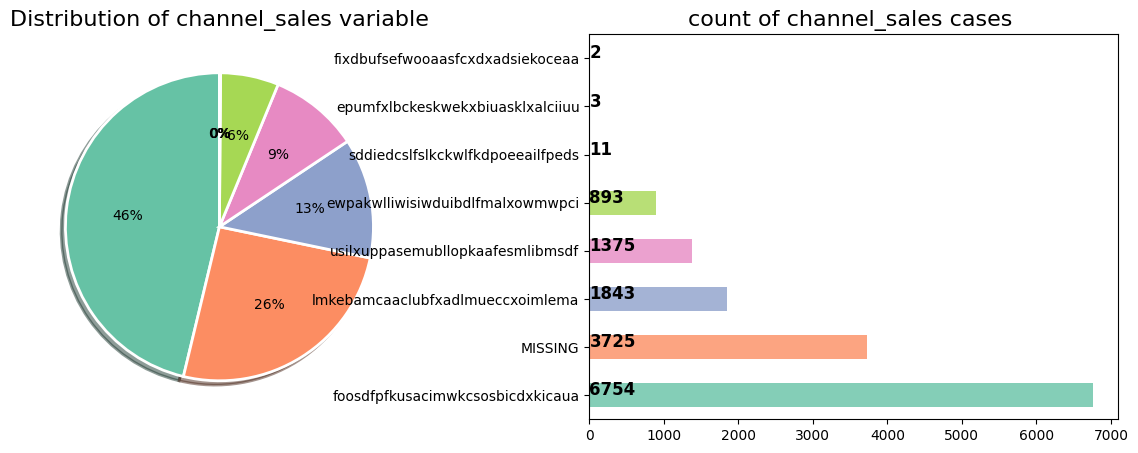

In [11]:
#first plot the channel_sales
plot_pie_barchart(client,'channel_sales')

<div style="background: #1D1E26; width: 800px; color: #D9B4B7; border-radius: 10px; margin: auto; padding: 20px;">
    <h3 style="text-align:center;color:#15BFAE">Summary</h3>
    <ul>
        <li>The majority of channel sales are attributed to the category <code>'foosdfpfkusacimwkcsosbicdxkicaua'</code>, which constitutes 46.00% of the total. This suggests that this channel is the most prevalent among the observed data.</li>
        <li>The category <code>'MISSING'</code> accounts for 26.00% of the data. This indicates a significant portion of missing or unrecorded data in the channel sales information.</li>
        <li>While <code>'foosdfpfkusacimwkcsosbicdxkicaua'</code> dominates the sales, there's notable diversity among other channels, albeit with much smaller percentages. <code>'lmkebamcaaclubfxadlmueccxoimlema'</code> represents 13.00%, <code>'usilxuppasemubllopkaafesmlibmsdf'</code> represents 9.00%, and <code>'ewpakwlliwisiwduibdlfmalxowmwpci'</code> represents 6.00% of the data. Some categories such as <code>'sddiedcslfslkckwlfkdpoeeailfpeds'</code>, <code>'epumfxlbckeskwekxbiuasklxalciiuu'</code>, and <code>'fixdbufsefwooaasfcxdxadsiekoceaa'</code> have negligible counts (0.00% each). While they contribute minimally to the overall distribution, they still represent unique segments of the data.</li>
    </ul>
</div>


percentage values:
f = 82.00%
t = 18.00%
count values:
f    11955
t     2651
Name: has_gas, dtype: int64


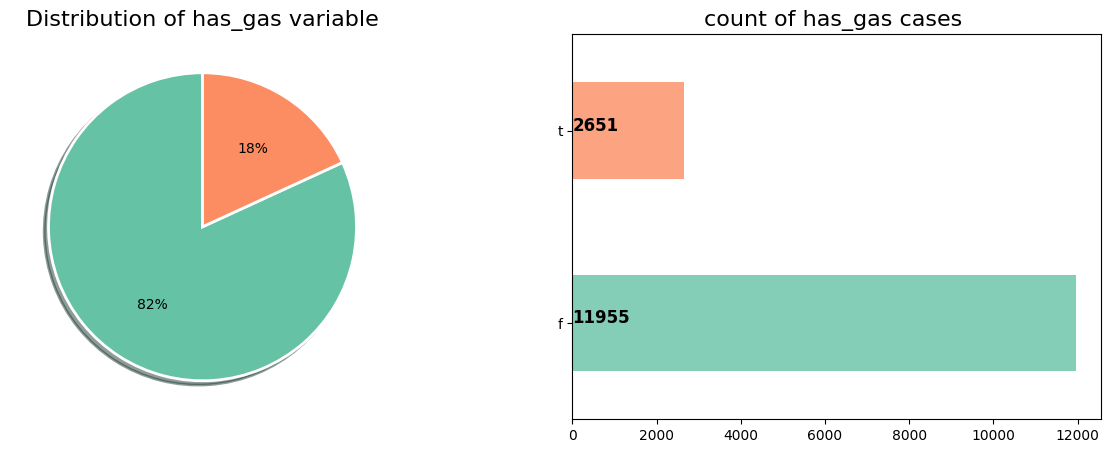

In [12]:
#plot for has gas
plot_pie_barchart(client,'has_gas')

<div style="background: #1D1E26; width: 800px; color: #D9B4B7; border-radius: 10px; margin: auto; padding: 20px;">
    <h3 style="text-align:center;color:#15BFAE">Summary</h3>
    <ul>
        <li>The <code>has_gas</code> feature exhibits a significant class imbalance, with 'f' (representing absence of gas) constituting 82.00% of the data, while 't' (representing presence of gas) accounts for only 18.00%. This indicates that the majority of observations in the dataset do not have gas service.</li>
        <li>The overwhelming majority of observations (82.00%) indicate the absence of gas service. This could reflect regional differences in utility infrastructure or customer preferences</li>
    </ul>
</div>


percentage values:
lxidpiddsbxsbosboudacockeimpuepw = 49.00%
kamkkxfxxuwbdslkwifmmcsiusiuosws = 29.00%
ldkssxwpmemidmecebumciepifcamkci = 22.00%
MISSING = 0.00%
usapbepcfoloekilkwsdiboslwaxobdp = 0.00%
ewxeelcelemmiwuafmddpobolfuxioce = 0.00%
count values:
lxidpiddsbxsbosboudacockeimpuepw    7097
kamkkxfxxuwbdslkwifmmcsiusiuosws    4294
ldkssxwpmemidmecebumciepifcamkci    3148
MISSING                               64
usapbepcfoloekilkwsdiboslwaxobdp       2
ewxeelcelemmiwuafmddpobolfuxioce       1
Name: origin_up, dtype: int64


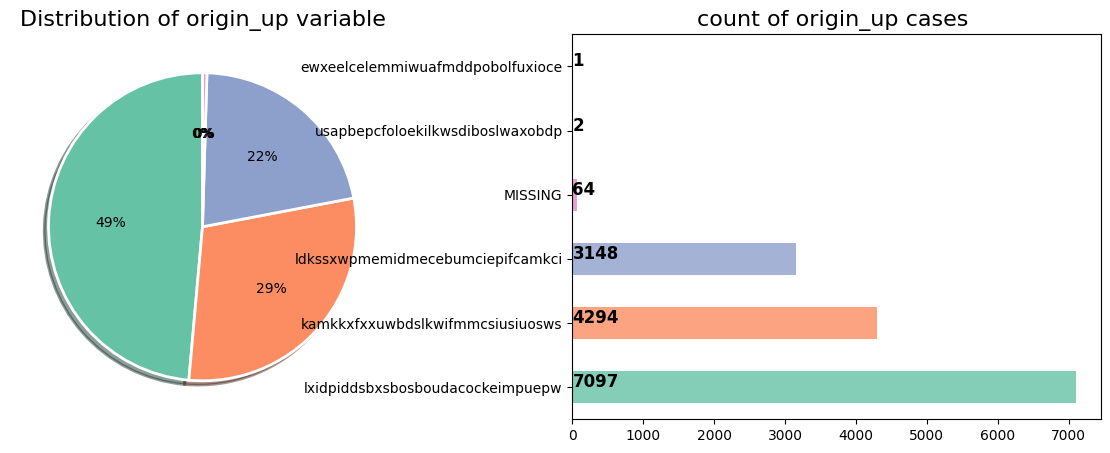

In [13]:
plot_pie_barchart(client,'origin_up')

<div style="background: #1D1E26; width: 800px; color: #D9B4B7; border-radius: 10px; margin: auto; padding: 20px;">
    <h3 style="text-align:center;color:#15BFAE">Summary</h3>
    <ul>
        <li>The majority of the data is attributed to the category <code>'lxidpiddsbxsbosboudacockeimpuepw'</code>, which constitutes 49.00% of the total. This suggests that this origin is the most prevalent among the observed data. The category <code>'kamkkxfxxuwbdslkwifmmcsiusiuosws'</code> represents 29.00% of the data, indicating a significant portion of observations originating from this source. <code>'ldkssxwpmemidmecebumciepifcamkci'</code> accounts for 22.00% of the data, representing another substantial segment of the observed origins.</li>
        <li>Categories such as <code>'usapbepcfoloekilkwsdiboslwaxobdp'</code> and <code>'ewxeelcelemmiwuafmddpobolfuxioce'</code> have extremely low counts, indicating their insignificance in the overall distribution. These categories may represent specific or unique origins that contribute minimally to the dataset.</li>
    </ul>
</div>


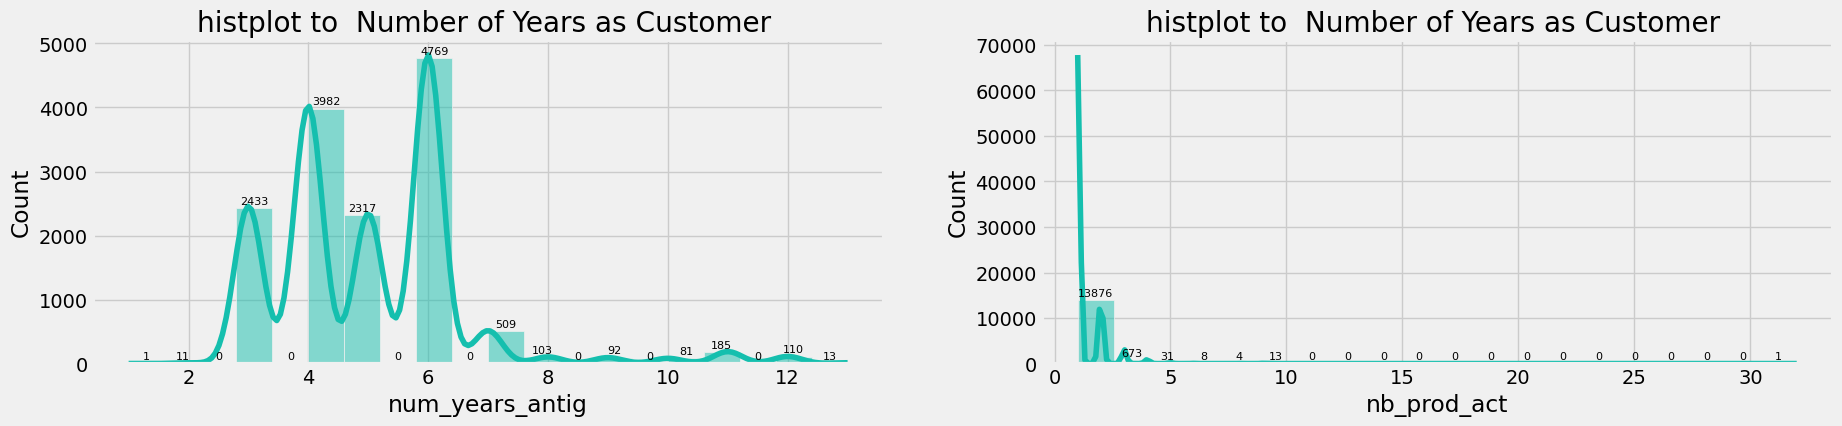

In [14]:
plt.rcParams['figure.figsize']=(20,4)
plt.style.use('fivethirtyeight')

#hist plot for num_years_antig
plt.subplot(121)
sns.histplot(client,x='num_years_antig',bins=20,kde=True,color='#15BFAE')
plt.title('histplot to  Number of Years as Customer ')
for p in plt.gca().patches:
    plt.gca().annotate(f'{int(p.get_height())}',(p.get_x() +p.get_width()/2.,p.get_height()),
                       ha='center',va='center',fontsize=8,color='black',xytext=(0,5),textcoords='offset points')

plt.subplot(122)
#hist plot for num_years_antig
sns.histplot(client,x='nb_prod_act',bins=20,kde=True,color='#15BFAE')
plt.title('histplot to  Number of Years as Customer ')
for p in plt.gca().patches:
    plt.gca().annotate(f'{int(p.get_height())}',(p.get_x() +p.get_width()/2.,p.get_height()),
                       ha='center',va='center',fontsize=8,color='black',xytext=(0,5),textcoords='offset points')

<div style="background: #1D1E26; width: 800px; color: #D9B4B7; border-radius: 10px; margin: auto; padding: 20px;">
    <h3 style="text-align:center;color:#15BFAE">Summary</h3>
    <h4>Number of Years as Customer</h4>
    <ul>
        <li>The majority of customers have been with the company for 6 years, accounting for 33.00% of the total observations. This suggests a substantial portion of long-standing customers within the dataset. Customers with 4 years of tenure represent 27.00% of the data, indicating another significant segment of the customer base.</li>
        <li>There is a gradual decrease in the percentage of customers as the number of years decreases, with 3 years representing 17.00% and 5 years representing 16.00% of the data. The percentage sharply declines for customers with 7 years (3.00%), and further decreases for those with 11, 12, 8, 9, and 10 years of tenure, each representing 1.00% of the data. Customers with 13, 2, and 1 year(s) of tenure have negligible representation, each accounting for 0.00% of the data.</li>
        <li>The concentration of customers with 6 to 4 years of tenure suggests a stable and loyal customer base, reflecting satisfaction or continued reliance on the company's services. The decline in percentages for customers with fewer years of tenure may indicate attrition or churn, as newer customers are less represented in the dataset.</li>
    </ul>
    <h4>Number of Active Products</h4>
    <ul>
        <li>The vast majority of customers have 1 active product, comprising 78.00% of the total observations. This indicates that most customers have only one product from the company. A smaller proportion of customers have 2 active products, representing 17.00% of the data. This suggests that some customers have multiple products but is significantly less common than having just one product.</li>
        <li>The percentage sharply decreases for customers with higher numbers of active products. Only 4.00% of customers have 3 active products, and 1.00% have 4 active products. Customers with 5 or more active products are extremely rare, each accounting for 0.00% of the data.</li>
    </ul>
</div>

<a id='num'>

<div style="background:#8C4B45;width:500px;margin:auto;border-radius:8px;padding:5px">
    <h2 style="color:#F2F2F2;text-align:center;">3-numerical Columns</h2>
</div>

In [15]:
numerical_columns = client.select_dtypes('number').drop(['nb_prod_act', 'num_years_antig', 'churn'], axis=1).columns
external_stylesheets = ['https://stackpath.bootstrapcdn.com/bootstrap/4.5.2/css/bootstrap.min.css']

app = Dash(external_stylesheets=external_stylesheets)

app.layout = html.Div([
    html.H1('Histogram plot for numerical columns',className='text-center mt-4 mb-4'),
    html.Div([
        dcc.Dropdown(
            id='drop',
            options=[{'label': col, 'value': col} for col in numerical_columns],
            value=numerical_columns[0],className='form-control mb-3'
        ),
        dcc.Graph(id='hist')
    ],className='container')
],style={'background-color': '#f8f9fa', 'padding': '20px'})

@app.callback(
    Output('hist', 'figure'),
    [Input('drop', 'value')]
)
def update_fig(selected_column):
    fig = px.histogram(client, x=selected_column)
    fig.update_layout(title=f'Histogram of {selected_column}',
                      title_font=dict(size=20),title_x=0.5)
    fig.update_xaxes(title_font=dict(size=16),tickfont=dict(size=14))
    fig.update_yaxes(title_font=dict(size=16),tickfont=dict(size=14))
    return fig



app.run_server(debug=True)

<IPython.core.display.Javascript object>

<a id='bi_analysis'>
<div style="background:#4C4A59;width:900px;margin:auto;border-radius:8px;padding:8px">
    <h1 style="color:#DBF227;text-align:center;">2. Bivariate Analysis</h1>
</div>

<a id='client_life'>
<div style="background:#8C4B45;width:500px;margin:auto;border-radius:8px;padding:3px">
    <h2 style="color:#F2F2F2;text-align:center;">client life</h2>
</div>

In [16]:
client['contract_tenure']=(client['date_end']-client['date_activ']).dt.days

In [17]:
client['contract_tenure'].describe()

count    14606.000000
mean      2007.537587
std        604.875654
min        731.000000
25%       1461.000000
50%       1828.500000
75%       2353.000000
max       4795.000000
Name: contract_tenure, dtype: float64

In [18]:
fig = px.histogram(client, x='contract_tenure', color='churn',title='Distribution of contract_tenure by churn',labels={'count':'Frequency'},
                  hover_data={'contract_tenure':True, 'churn':True},barmode='overlay')


fig.update_layout(title_font=dict(size=20),title_x=0.5, height=500)
fig.update_xaxes(title_font=dict(size=16),tickfont=dict(size=14),range=[500,5000])
fig.update_yaxes(title_font=dict(size=16),tickfont=dict(size=14))
# Show the plot
fig.show()

In [19]:
client_tenure=client.groupby('churn')['contract_tenure'].mean().reset_index()
fig=px.bar(client_tenure,x='churn',y='contract_tenure',text='contract_tenure',
          labels={'contract_tenure':'days','churn':'Churn'},
          title='Churn Rate by contract tenure',
          color_discrete_sequence=['orange'])
fig.update_traces(texttemplate='%{text:.2f}',textposition='outside')
fig.update_layout(title_font=dict(size=20),title_x=0.5, height=500)
fig.update_xaxes(title_font=dict(size=16),tickfont=dict(size=14))
fig.update_yaxes(title_font=dict(size=16),tickfont=dict(size=14),range=[0,2500])
fig.show()

<div style="background: #1D1E26; width: 800px; color: #D9B4B7; border-radius: 10px; margin: auto; padding: 20px;">
    <h3 style="text-align:center;color:#15BFAE">Summary</h3>
    <ul>
        <li>For non-churned customers (churn = 0), the average contract tenure is approximately 2022.20 days.</li>
        <li>For churned customers (churn = 1), the average contract tenure is slightly lower, approximately 1871.24 days.</li>
        <li>This suggests that there is a difference in the average contract tenure between churned and non-churned customers. Specifically, churned customers tend to have slightly shorter contract tenures on average compared to non-churned customers.</li>
    </ul>
</div>


In [20]:
bins = [-1, 5, 10, 20, 30]
labels = ['0-5', '6-10', '11-20', '21-30']
descount_level=pd.cut(client['forecast_discount_energy'],bins=bins,labels=labels)
client['descount_level']=descount_level
churn_discount=pd.crosstab(client.descount_level,client.churn)
fig=px.bar(churn_discount,x=churn_discount.index,y=[0,1],text='value',
           labels={'value':'count','descount_level':'Discount Level'},barmode='group',title='Churn Count by Discount Level',)
fig.update_traces(texttemplate='%{text}',textposition='outside')
fig.update_layout(title_font=dict(size=20),title_x=0.5, height=600)
fig.update_xaxes(title_font=dict(size=14),tickfont=dict(size=12))
fig.update_yaxes(title_font=dict(size=14),tickfont=dict(size=12),range=[0,15000])
fig.show()

<div style="background: #1D1E26; width: 800px; color: #D9B4B7; border-radius: 10px; margin: auto; padding: 20px;">
    <h3 style="text-align:center;color:#15BFAE">Summary</h3>
    <ul>
        <li>For the "0-5" discount level category, the churn rate is approximately 9.61%.</li>
        <li>For the "21-30" discount level category, the churn rate is approximately 12.45%.</li>
    </ul>
</div>



<a id='Consumption'>

<div style="background:#8C4B45;width:500px;margin:auto;border-radius:8px;padding:3px">
    <h2 style="color:#F2F2F2;text-align:center;">Consumption</h2>
</div>

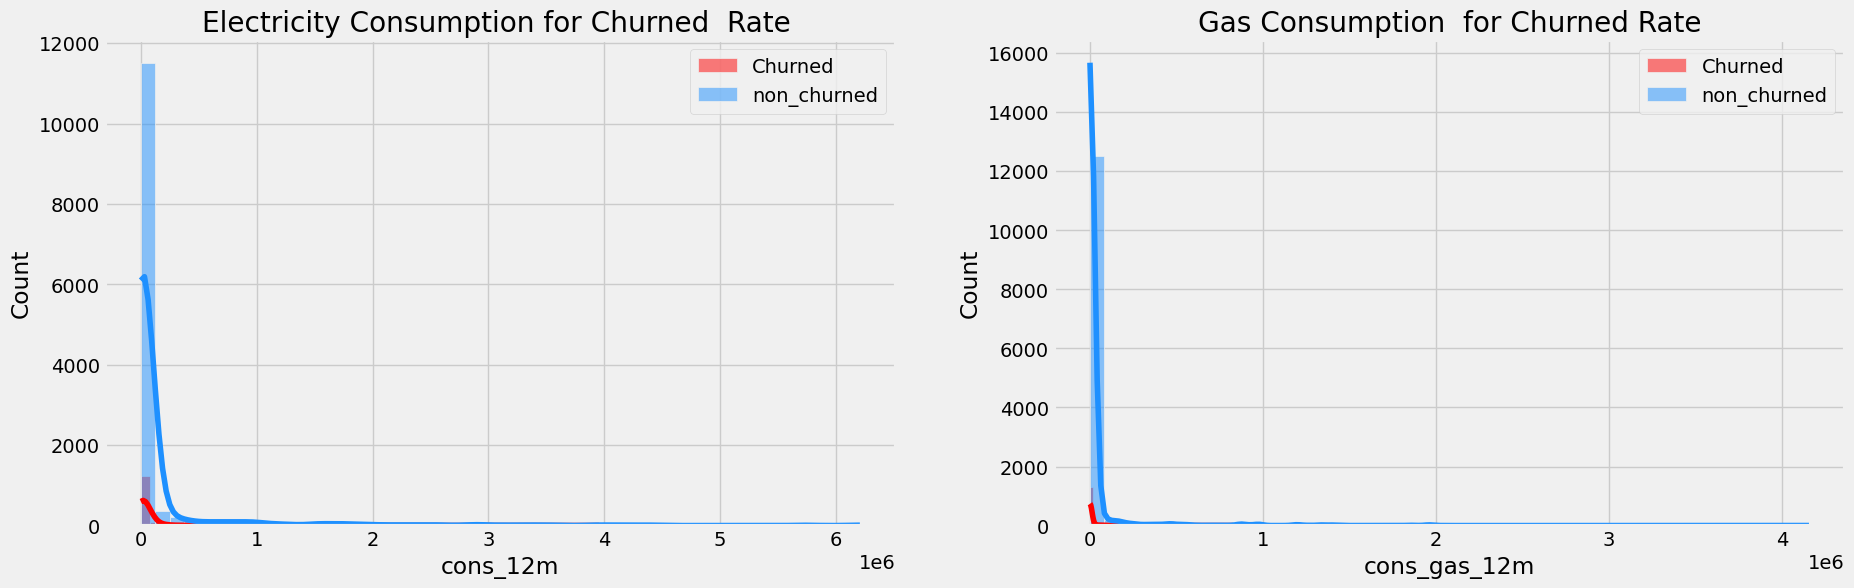

In [21]:
churned= client[client['churn']==1]
non_churned=client[client['churn']==0]

fig, ax = plt.subplots(1, 2, figsize=(20, 6))

sns.histplot(churned['cons_12m'], ax=ax[0], alpha=0.5, kde=True, color='red', label='Churned', bins=50)
sns.histplot(non_churned['cons_12m'], ax=ax[0], alpha=0.5, kde=True, color='dodgerblue', label='non_churned', bins=50)
ax[0].legend()
ax[0].set_title('Electricity Consumption for Churned  Rate ')

sns.histplot(churned['cons_gas_12m'], ax=ax[1], alpha=0.5, kde=True, color='red', label='Churned', bins=50)
sns.histplot(non_churned['cons_gas_12m'], ax=ax[1], alpha=0.5, kde=True, color='dodgerblue', label='non_churned', bins=50)
ax[1].legend()
ax[1].set_title('Gas Consumption  for Churned Rate')

plt.show()


In [22]:
churn_gas=client.groupby('churn')['cons_gas_12m'].mean().reset_index()

fig_gas=px.bar(churn_gas,x='churn',y='cons_gas_12m',text='cons_gas_12m',
          title='average consumption Gas  by churn',
          color_discrete_sequence=['orange'])

fig_gas.update_traces(texttemplate='%{text:.2f}',textposition='outside')


churn_cons=client.groupby('churn')['cons_12m'].mean().reset_index()
fig_cons=px.bar(churn_cons,x='churn',y='cons_12m',text='cons_12m',
          title='average consumption by churn',
          color_discrete_sequence=['orange'])

fig_cons.update_traces(texttemplate='%{text:.2f}',textposition='outside')


fig = make_subplots(rows=1, cols=2)
fig.add_trace(fig_cons.data[0],row=1,col=1,)
fig.add_trace(fig_gas.data[0],row=1,col=2)
fig.update_yaxes(range=[0, 220000], row=1, col=1)
fig.update_yaxes(range=[0, 40000], row=1, col=2)
fig.update_layout(
   title_text="Average Consumption by Churn",
    title_font=dict(size=20, color='black'),
    title_x=0.5,
    font=dict(color='black'),
    margin=dict(l=50, r=50, t=100, b=50)
)
fig.add_annotation(text="Average Consumption by Churn", x=0.5, y=220000, showarrow=False, font=dict(size=14, color='black'),row=1, col=1)
fig.add_annotation(text="Average Consumption Gas by Churn", x=0.5, y=40000, showarrow=False, font=dict(size=14, color='black'),row=1, col=2)

fig.show()

In [23]:
#distrubtion of cons last month
churn_cons_month=client.groupby('churn')['cons_last_month'].mean().reset_index()

fig_cons=px.bar(churn_cons_month,x='churn',y='cons_last_month',text='cons_last_month',
          title='average consumption last month  by churn',
          color_discrete_sequence=['orange'])

fig_cons.update_traces(texttemplate='%{text:.2f}',textposition='outside')
fig_cons.update_layout(title_font=dict(size=20),title_x=0.5, height=500)
fig_cons.update_xaxes(title_font=dict(size=16),tickfont=dict(size=14))
fig_cons.update_yaxes(title_font=dict(size=16),tickfont=dict(size=14),range=[0,20000])
fig_cons.show()

<div style="background: #1D1E26; width: 800px; color: #D9B4B7; border-radius: 10px; margin: auto; padding: 20px;">
    <h3 style="text-align:center;color:#15BFAE">Summary</h3>
    <ul>
        <li>For customers who did not churn (churn = 0), the average gas consumption over the year is approximately 30,121.50. and For customers who churned (churn = 1), the average gas consumption over the year is approximately 9,235.41.</li>
        <li>This suggests that, on average, customers who did not churn have higher gas consumption compared to customers who churned.</li>
        <li>For customers who did not churn (churn = 0), the average consumption over the year is approximately 167,867.27. and For customers who churned (churn = 1), the average consumption over the year is approximately 78,862.48.</li>
        <li>This indicates that, on average, customers who did not churn have higher consumption over the year compared to customers who churned.</li>
        <li>For customers who did not churn (churn = 0), the average consumption in the last month is approximately 17,046.35.
For customers who churned (churn = 1), the average consumption in the last month is approximately 7,205.24.</li>
        <li>This indicates that, on average, customers who did not churn have higher consumption in the last month compared to customers who churned.</li>
    </ul>
</div>


In [24]:
fig = px.histogram(client, x='imp_cons', color='churn',title='Distribution of imp_cins by churn',labels={'count':'Frequency'})


fig.update_layout(title_font=dict(size=20),title_x=0.5, height=500)
fig.update_xaxes(title_font=dict(size=16),tickfont=dict(size=14),range=[0,10000])
fig.update_yaxes(title_font=dict(size=16),tickfont=dict(size=14))
# Show the plot
fig.show()

In [25]:
#distrubtion of cons last month
churn_imp_cons=client.groupby('churn')['imp_cons'].mean().reset_index()

fig_cons=px.bar(churn_imp_cons,x='churn',y='imp_cons',text='imp_cons',
          title='average imp_cons  by churn',
          color_discrete_sequence=['orange'])

fig_cons.update_traces(texttemplate='%{text:.2f}',textposition='outside')
fig_cons.update_layout(title_font=dict(size=20),title_x=0.5, height=500)
fig_cons.update_xaxes(title_font=dict(size=16),tickfont=dict(size=14))
fig_cons.update_yaxes(title_font=dict(size=16),tickfont=dict(size=14),range=[0,200])
fig_cons.show()

<div style="background: #1D1E26; width: 800px; color: #D9B4B7; border-radius: 10px; margin: auto; padding: 20px;">
    <h3 style="text-align:center;color:#15BFAE">Summary</h3>
    <ul>
        <li>The average value of 'imp_cons' for non-churned customers (churn = 0) is approximately 152.96, while the average value for churned customers (churn = 1) is slightly lower, approximately 151.14.</li>
        <li>This suggests that there is a slight difference in the average 'imp_cons' value between churned and non-churned customers.</li>
    </ul>
</div>




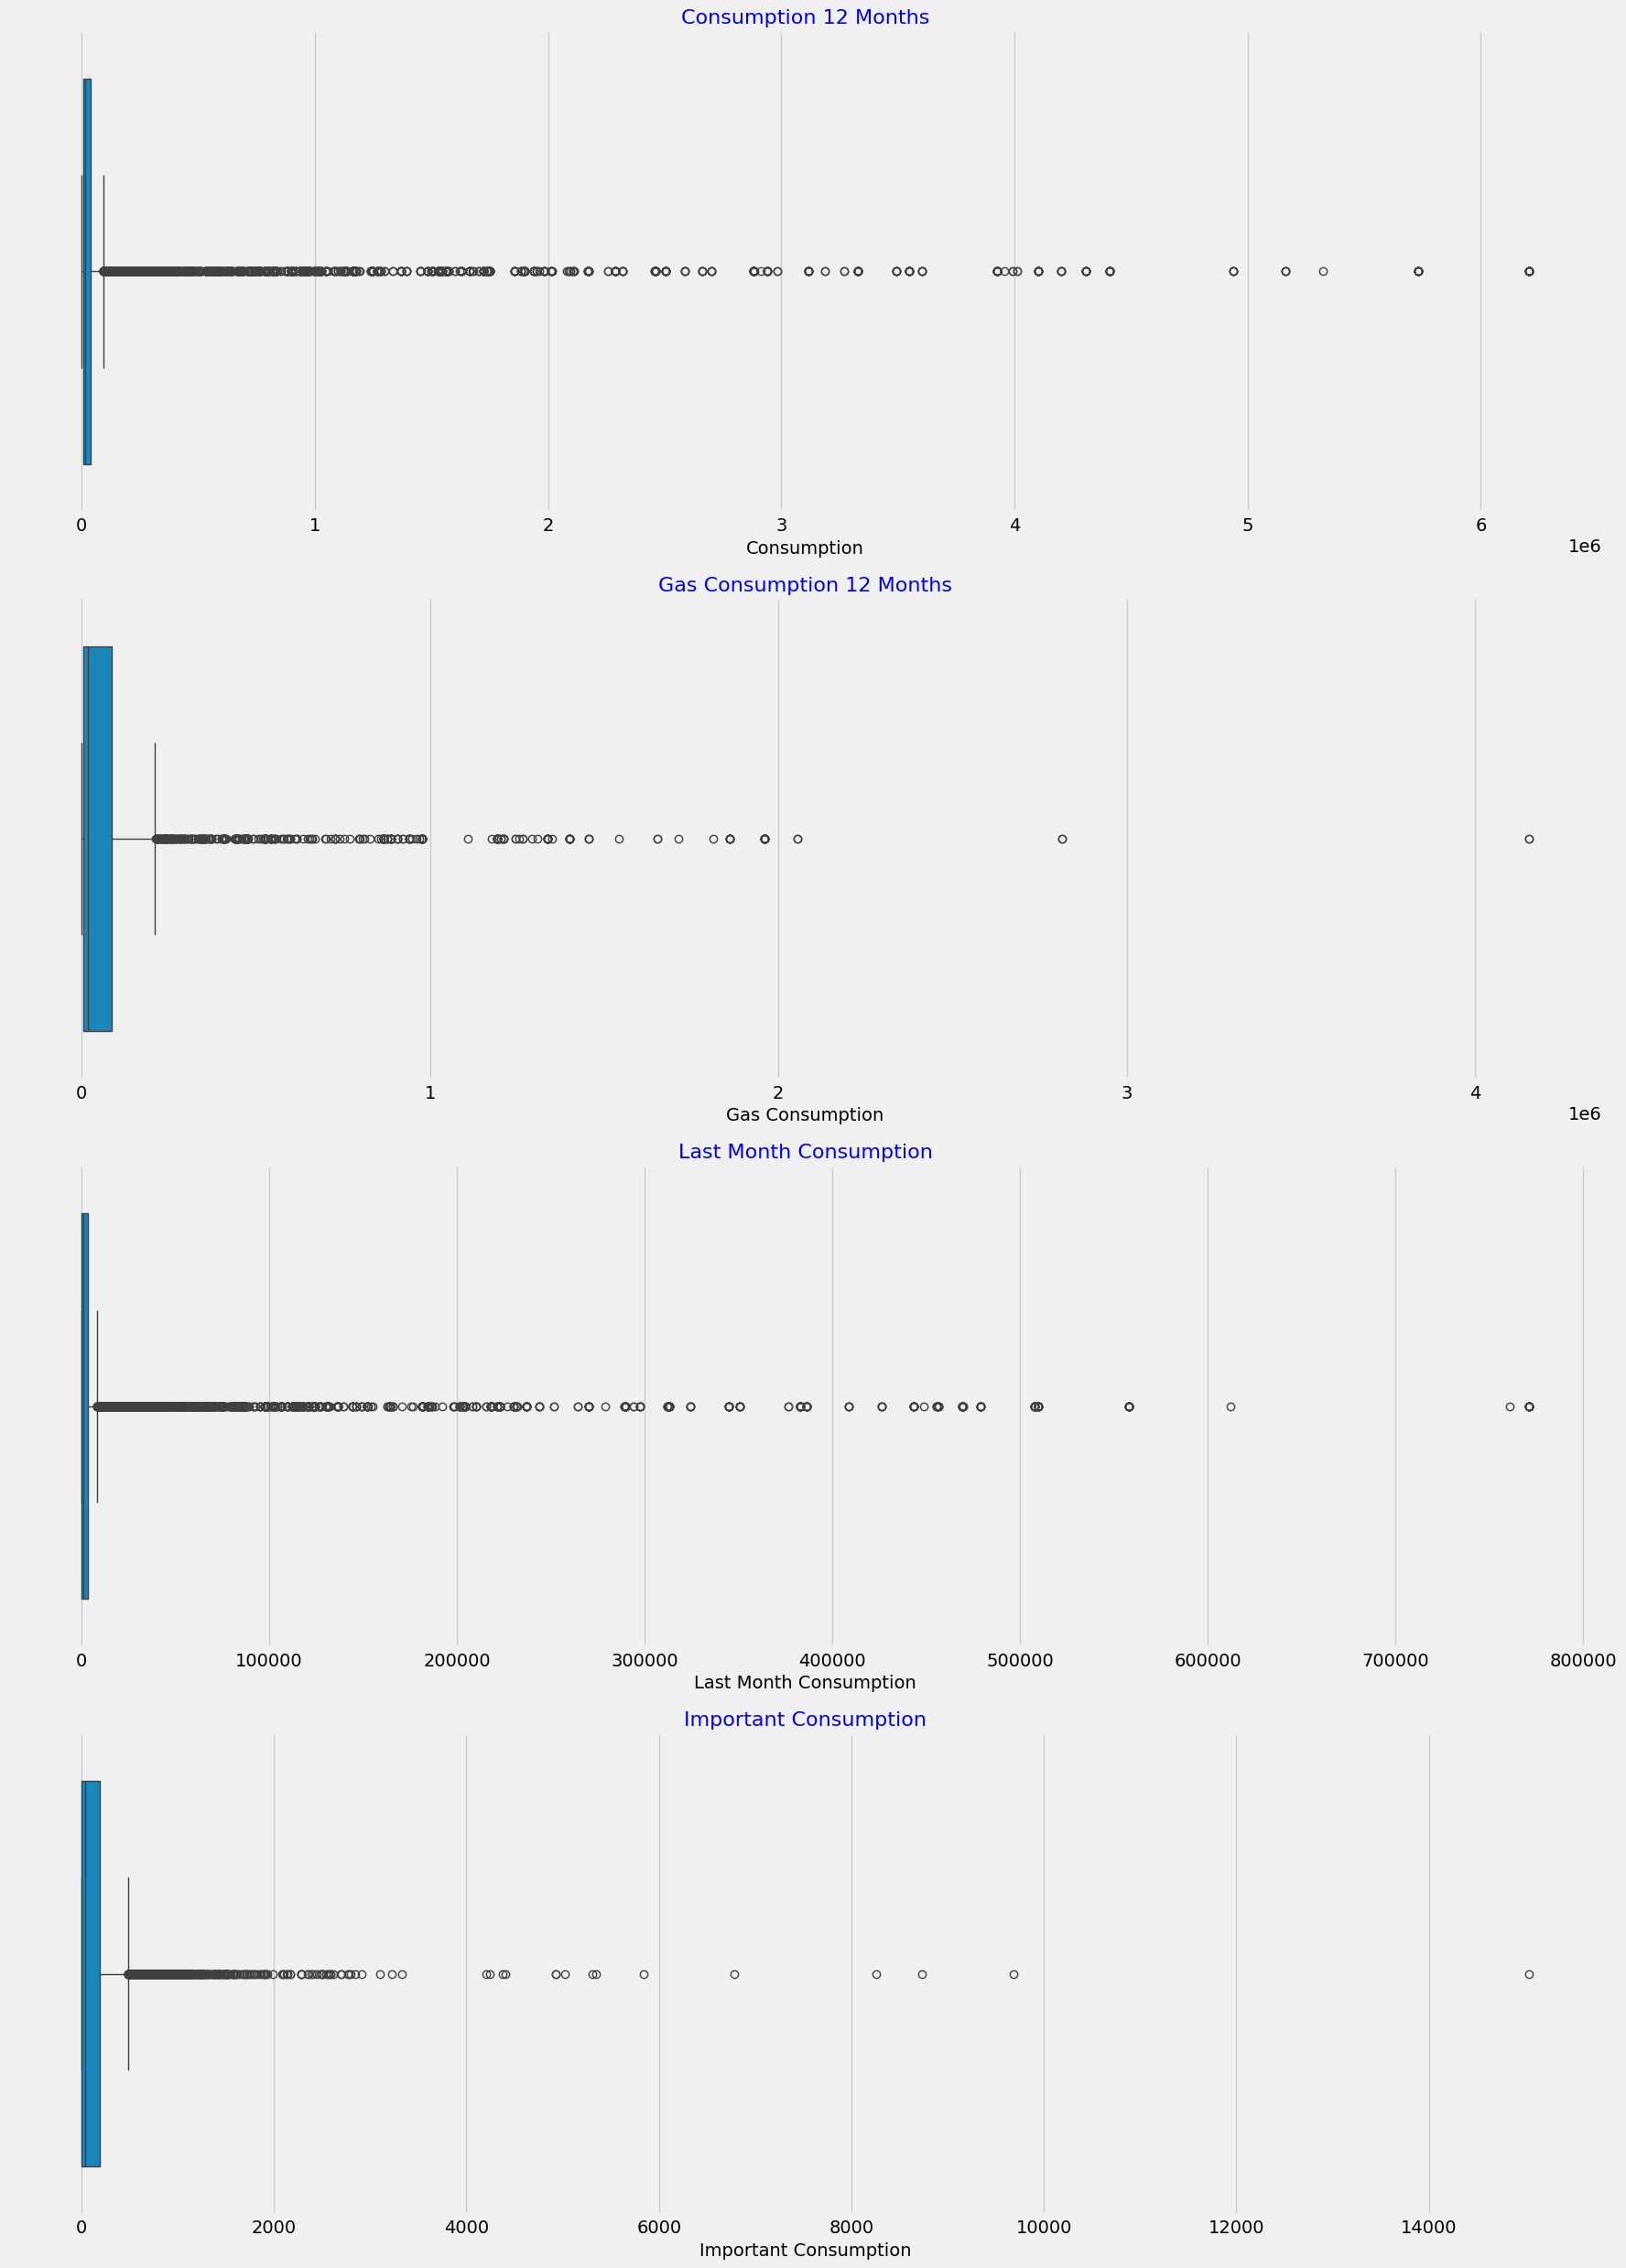

In [26]:
fig,axs=plt.subplots(nrows=4,figsize=(18,25))

#plot histogram

sns.boxplot(x=client['cons_12m'],ax=axs[0])
sns.boxplot(x=client[client['has_gas']=='t']['cons_gas_12m'],ax=axs[1])
sns.boxplot(x=client['cons_last_month'],ax=axs[2])
sns.boxplot(x=client['imp_cons'],ax=axs[3])

axs[0].set_title('Consumption 12 Months', fontsize=16,color='blue')
axs[1].set_title('Gas Consumption 12 Months', fontsize=16,color='blue')
axs[2].set_title('Last Month Consumption', fontsize=16,color='blue')
axs[3].set_title('Important Consumption', fontsize=16,color='blue')

axs[0].set_xlabel('Consumption', fontsize=14)
axs[1].set_xlabel('Gas Consumption', fontsize=14)
axs[2].set_xlabel('Last Month Consumption', fontsize=14)
axs[3].set_xlabel('Important Consumption', fontsize=14)

plt.tight_layout()
plt.show()


<div style="background: #1D1E26; width: 800px; color: #D9B4B7; border-radius: 10px; margin: auto; padding: 20px;">
    <ul>
               <li>We can see that the consumption outlook shows many outliers and skewness</li>
    </ul>
</div>


<a id='Forecast'>

<div style="background:#8C4B45;width:500px;margin:auto;border-radius:8px;padding:3px">
    <h2 style="color:#F2F2F2;text-align:center;">Forecast</h2>
</div>

In [27]:
def plot_distribution(dataframe, column, ax, bins_=50):
    """
    Plot variable distribution in a stacked histogram of churned or retained company
    """
    temp = pd.DataFrame({"Retention": dataframe[dataframe["churn"]==0][column],
    "Churn":dataframe[dataframe["churn"]==1][column]})
    temp[["Retention","Churn"]].plot(kind='hist', bins=bins_, ax=ax, stacked=True)
    ax.set_xlabel(column)
    ax.ticklabel_format(style='plain', axis='x')
    ax.set_ylabel('frequency')
    ax.set_title(f'Distribution of {column} by churn',color='blue')
    ax.legend(['Retention', 'Churn'], loc='upper right')
    ax.set_facecolor('#f0f0f0')
    plt.tight_layout()



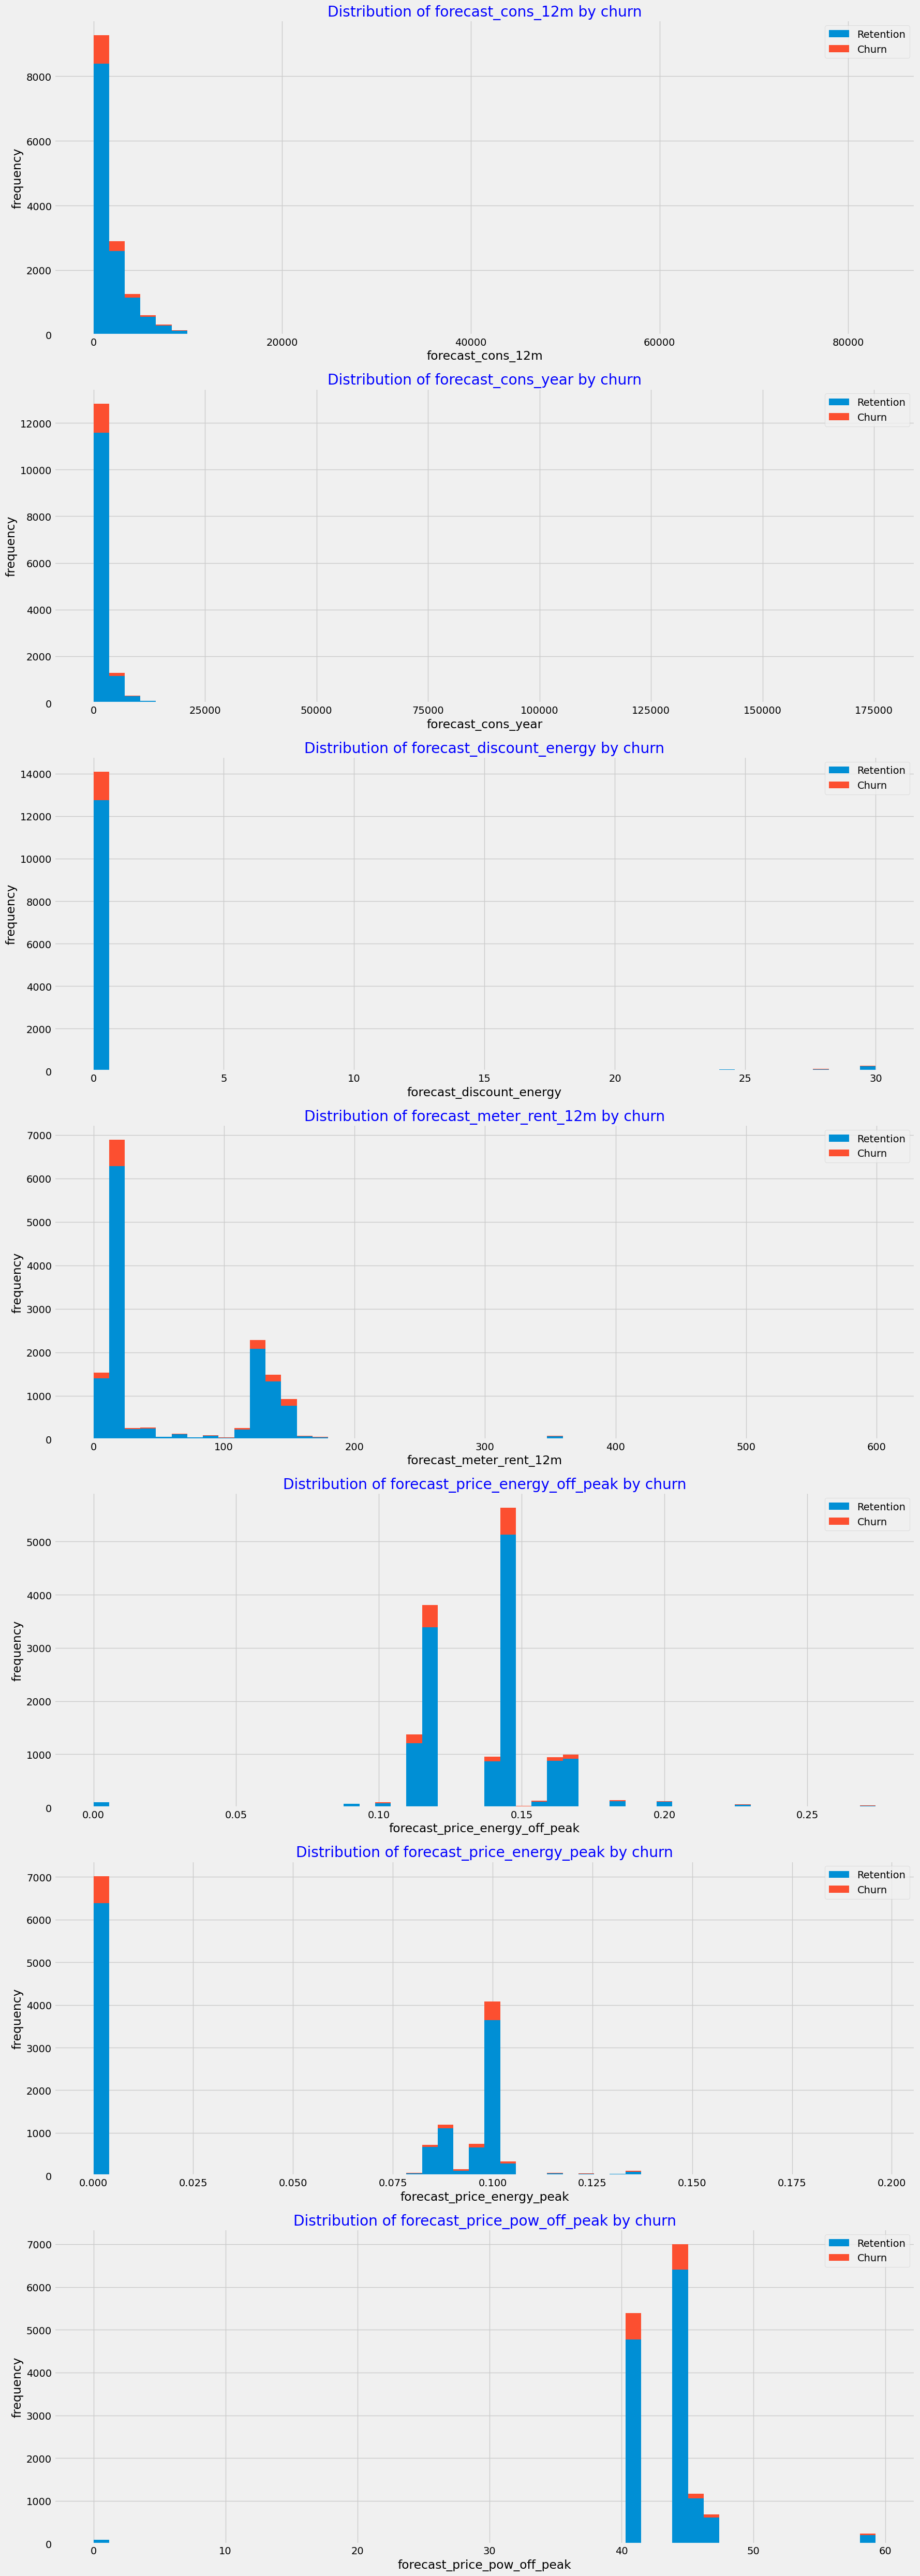

In [28]:
fig, axs = plt.subplots(nrows=7, figsize=(18,50))

# Plot histogram
plot_distribution(client, "forecast_cons_12m", axs[0])
plot_distribution(client, "forecast_cons_year", axs[1])
plot_distribution(client, "forecast_discount_energy", axs[2])
plot_distribution(client, "forecast_meter_rent_12m", axs[3])
plot_distribution(client, "forecast_price_energy_off_peak", axs[4])
plot_distribution(client, "forecast_price_energy_peak", axs[5])
plot_distribution(client, "forecast_price_pow_off_peak", axs[6])

<a id='power'>

<div style="background:#8C4B45;width:500px;margin:auto;border-radius:8px;padding:3px">
    <h2 style="color:#F2F2F2;text-align:center;">Subscribed power</h2>
</div>

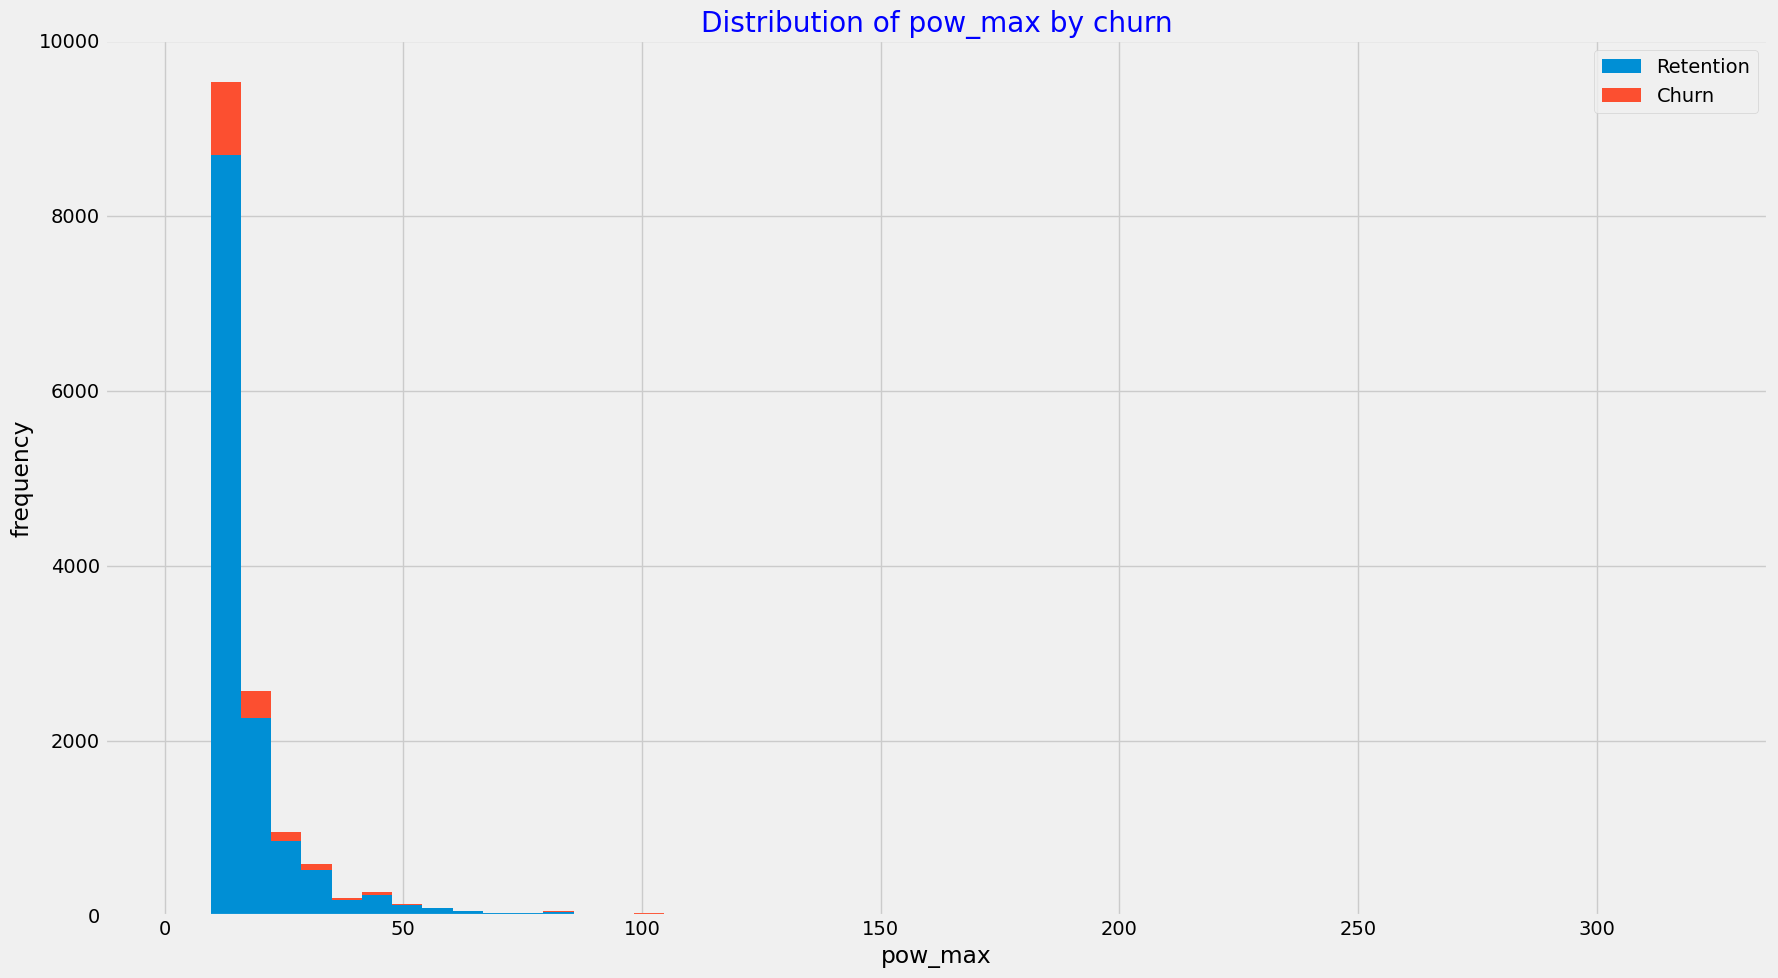

In [29]:
fig, axs = plt.subplots(nrows=1, figsize=(18, 10))
plot_distribution(client, 'pow_max', axs)

In [30]:
churn_power=client.groupby('churn')['pow_max'].mean().reset_index()
fig=px.bar(churn_power,x='churn',y='pow_max',text='pow_max',
          labels={'pow_max':'Subscibed Power','churn':'Churn'},
          title='Churn Rate by Subscibed Power',
          color_discrete_sequence=['orange'])
fig.update_traces(texttemplate='%{text:.2f}',textposition='outside')
fig.update_layout(title_font=dict(size=20),title_x=0.5, height=500)
fig.update_xaxes(title_font=dict(size=16),tickfont=dict(size=14))
fig.update_yaxes(title_font=dict(size=16),tickfont=dict(size=14))
fig.show()

<div style="background: #1D1E26; width: 800px; color: #D9B4B7; border-radius: 10px; margin: auto; padding: 20px;">
    <h3 style="text-align:center;color:#15BFAE">Summary</h3>
    <ul>
        <li>For non-churned customers (churn = 0), the average maximum power consumption is approximately 18.00.</li>
        <li>For churned customers (churn = 1), the average maximum power consumption is slightly higher, approximately 19.39.</li>
        <li>This suggests that churned customers tend to have a slightly higher average maximum power consumption compared to non-churned customers.</li>
    </ul>
</div>


<a id='Margins'>

<div style="background:#8C4B45;width:500px;margin:auto;border-radius:8px;padding:3px">
    <h2 style="color:#F2F2F2;text-align:center;">Margins</h2>
</div>

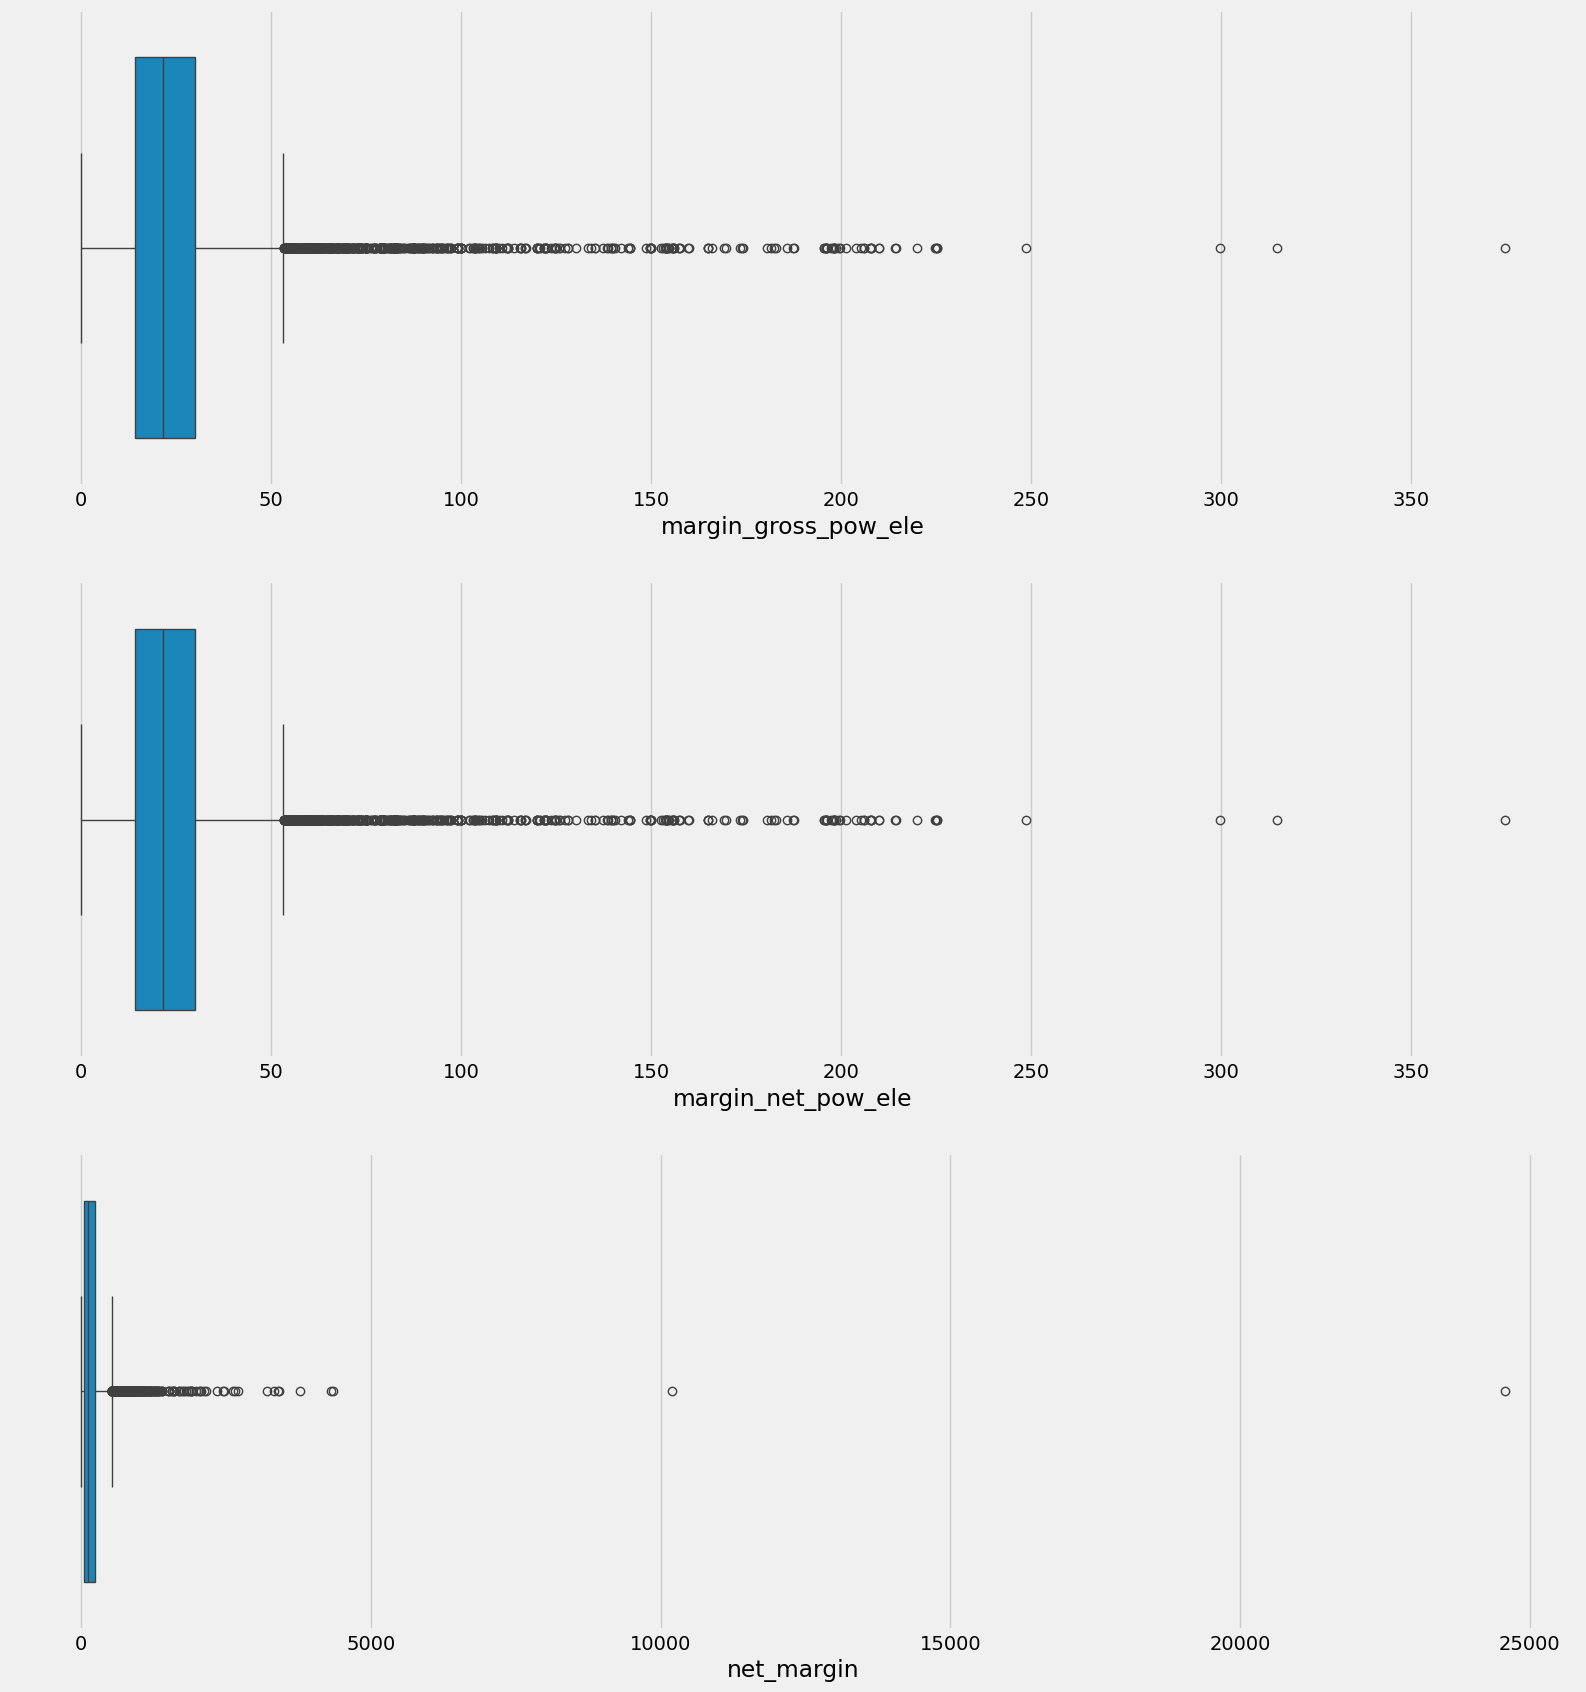

In [31]:
fig, axs = plt.subplots(nrows=3, figsize=(18,20))
# Plot histogram
sns.boxplot(x=client["margin_gross_pow_ele"], ax=axs[0])
sns.boxplot(x=client["margin_net_pow_ele"],ax=axs[1])
sns.boxplot(x=client["net_margin"], ax=axs[2])
# Remove scientific notation
axs[0].ticklabel_format(style='plain', axis='x')
axs[1].ticklabel_format(style='plain', axis='x')
axs[2].ticklabel_format(style='plain', axis='x')
plt.show()

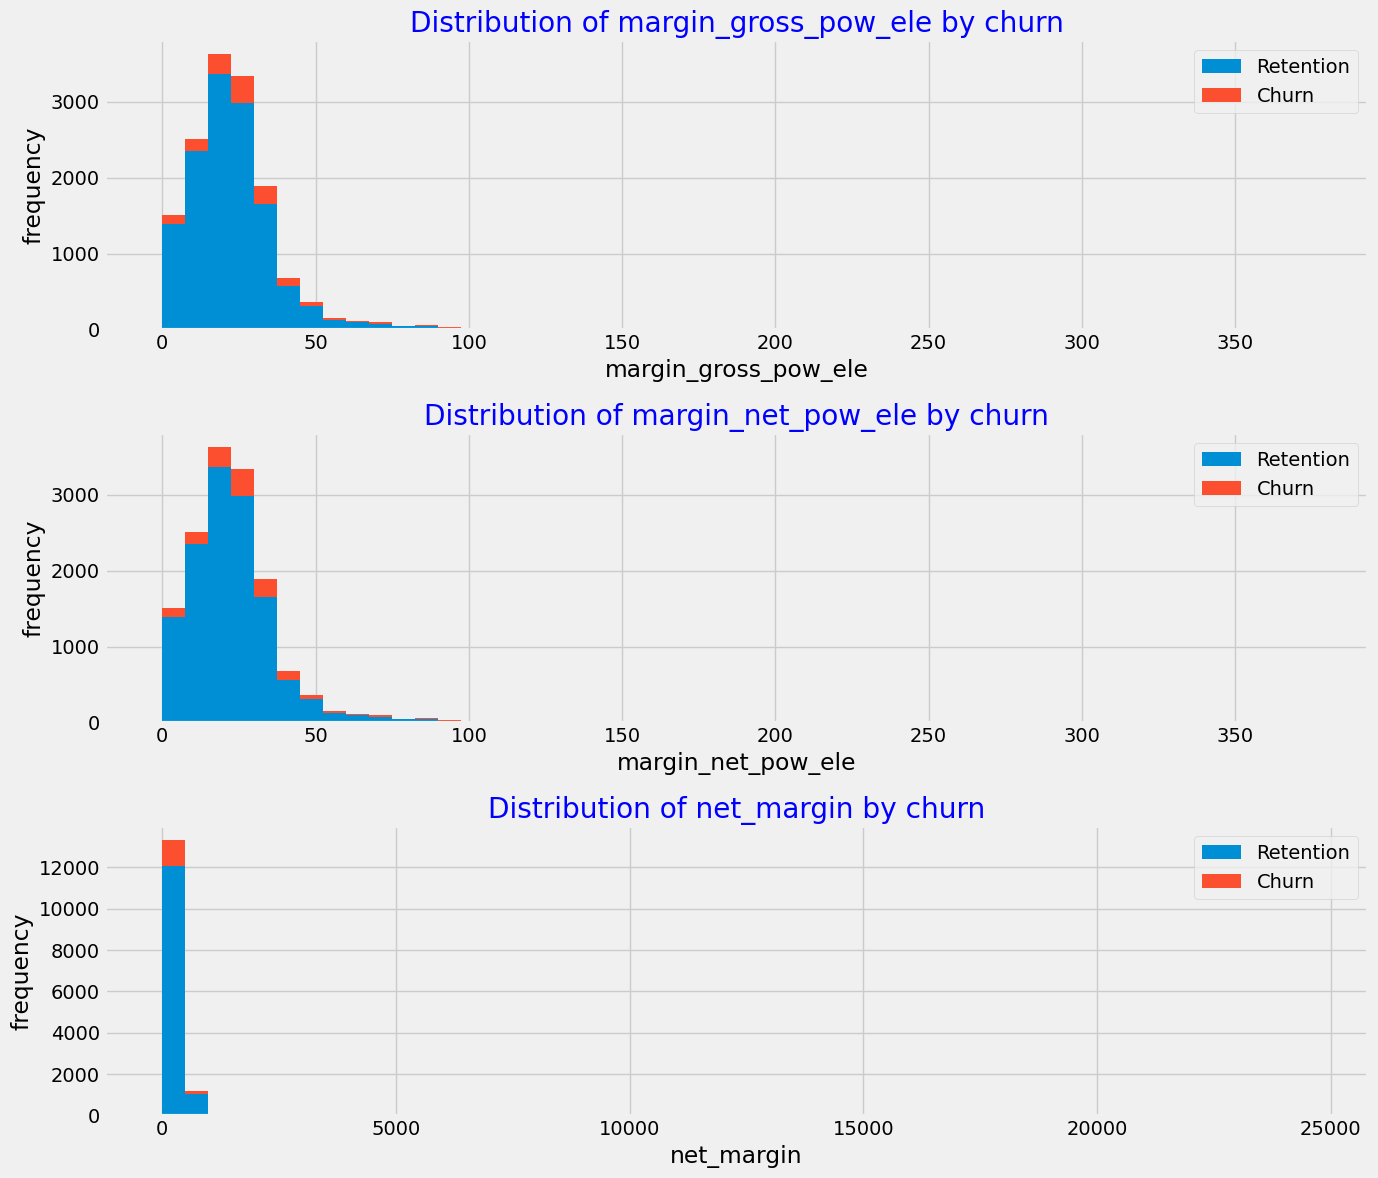

In [32]:
fig, axs = plt.subplots(nrows=3, figsize=(14, 12))
plot_distribution(client, 'margin_gross_pow_ele', ax=axs[0])
plot_distribution(client, 'margin_net_pow_ele', ax=axs[1])
plot_distribution(client, 'net_margin', ax=axs[2])

<div style="background: #1D1E26; width: 800px; color: #D9B4B7; border-radius: 10px; margin: auto; padding: 20px;">
    <h3 style="text-align:center;color:#15BFAE">Summary</h3>
    <h4>For non-churned customers </h4>
    <ul>
        <li>The average gross power margin is approximately 23.93.</li>
        <li>The average net power margin is approximately 23.93.</li>
        <li>The average net margin is approximately 185.06.</li>
    </ul>
    <h4>For churned customers </h4>
    <ul>
        <li>The average gross power margin is higher, approximately 30.47.</li>
        <li>The average net power margin is higher, approximately 30.47.</li>
        <li>The average net margin is also higher, approximately 228.36.</li>
    </ul>
    <p>This observation suggests that churned customers tend to have higher average margins compared to non-churned customers across all categories. Higher margins for churned customers could indicate that they may be more profitable on average, despite their higher likelihood of leaving.</p>
</div>


<a id='anther'>


<div style="background:#8C4B45;width:500px;margin:auto;border-radius:8px;padding:3px">
    <h2 style="color:#F2F2F2;text-align:center;">anther  columns</h2>
</div>

In [33]:
# plot has gas and churn
colors=['lightcoral','lightskyblue']

churn_gas=pd.crosstab(client.churn,client.has_gas)
fig=px.bar(churn_gas,x=churn_gas.index,y=['f','t'],text='value',labels={'value':'count'},barmode='group',title='Churn Count by Has Gas',
                     color_discrete_sequence=colors)
fig.update_traces(texttemplate='%{text}',textposition='outside')
fig.update_layout(title_font=dict(size=20),title_x=0.5)
fig.update_xaxes(title_font=dict(size=14),tickfont=dict(size=12))
fig.update_yaxes(title_font=dict(size=14),tickfont=dict(size=12),range=[0,12000])
fig.show()

In [34]:
churn_gas_rate=client.groupby('has_gas')['churn'].mean().reset_index()
fig=px.bar(churn_gas_rate,x='has_gas',y='churn',text='churn',
          labels={'has_gas':'Has Gas','churn':'Churn Rate'},
          title='Churn Rate by Has Gas',
          color_discrete_sequence=['orange'])
fig.update_traces(texttemplate='%{text:.2f}',textposition='outside')
fig.update_layout(title_font=dict(size=20),title_x=0.5)
fig.update_xaxes(title_font=dict(size=16),tickfont=dict(size=14))
fig.update_yaxes(title_font=dict(size=16),tickfont=dict(size=14),range=[0,0.2])
fig.show()

<div style="background: #1D1E26; width: 800px; color: #D9B4B7; border-radius: 10px; margin: auto; padding: 20px;">
    <h3 style="text-align:center;color:#15BFAE">Summary</h3>
    <ul>
        <li>Majority of customers (10753) do not have gas ('f'), while a smaller portion (1202) have gas ('t'). The ratio of customers without gas to those with gas is approximately 9:1.</li>
        <li>Among customers without gas, the churn rate is 10.05%, indicating that approximately 10.05% of customers without gas churned.
For customers with gas, the churn rate is lower at 8.19%, suggesting that customers with gas are slightly less likely to churn compared to those without gas.</li>
    </ul>
</div>


In [35]:
churn_chnnel=pd.crosstab(client.channel_sales,client.churn)
fig=px.bar(churn_chnnel,x=churn_chnnel.index,y=[0,1],text='value',labels={'value':'count'},barmode='group',title='Churn Count by channel sales',)
fig.update_traces(texttemplate='%{text}',textposition='outside')
fig.update_layout(title_font=dict(size=20),title_x=0.5, height=600)
fig.update_xaxes(title_font=dict(size=14),tickfont=dict(size=12))
fig.update_yaxes(title_font=dict(size=14),tickfont=dict(size=12),range=[0,7000])
fig.show()

In [36]:
churn_chnnal_rate=client.groupby('channel_sales')['churn'].mean().reset_index()
fig=px.bar(churn_chnnal_rate,x='channel_sales',y='churn',text='churn',
          labels={'channel_sales':'Channel Sales','churn':'Churn Rate'},
          title='Churn Rate by Channel Sales',
          color_discrete_sequence=['orange'])
fig.update_traces(texttemplate='%{text:.2f}',textposition='outside')
fig.update_layout(title_font=dict(size=20),title_x=0.5, height=500)
fig.update_xaxes(title_font=dict(size=16),tickfont=dict(size=14))
fig.update_yaxes(title_font=dict(size=16),tickfont=dict(size=14),range=[0,0.2])
fig.show()

<div style="background: #1D1E26; width: 800px; color: #D9B4B7; border-radius: 10px; margin: auto; padding: 20px;">
    <h3 style="text-align:center;color:#15BFAE">Summary</h3>
    <h4>Distribution of Churn Counts by Channel Sales:</h4>
    <ul>
        <li>The majority of customers with channel sales categorized as <code>'foosdfpfkusacimwkcsosbicdxkicaua'</code> have churned, with a count of 820 churned customers out of 6754 total customers. <code>'ewpakwlliwisiwduibdlfmalxowmwpci'</code> and <code>'usilxuppasemubllopkaafesmlibmsdf'</code> also have relatively high churn counts compared to other channel sales categories, with 75 and 138 churned customers respectively.</li>
    </ul>
    <h4>Churn Rates by Channel Sales:</h4>
    <ul>
        <li>Channel sales category <code>'foosdfpfkusacimwkcsosbicdxkicaua'</code> has the highest churn rate among all categories, with approximately 12.14% of customers churning.</li>
        <li>Categories <code>'ewpakwlliwisiwduibdlfmalxowmwpci'</code> and <code>'usilxuppasemubllopkaafesmlibmsdf'</code> also have notable churn rates, with approximately 8.40% and 10.04% of customers churning respectively.</li>
    </ul>
</div>
>


In [37]:
churn_product=pd.crosstab(client.nb_prod_act,client.churn)
fig=px.bar(churn_product,x=churn_product.index,y=[0,1],text='value',labels={'value':'count','nb_prod_act':'Number of Product'},barmode='group',title='Churn Count by Number of Product',)
fig.update_traces(texttemplate='%{text}',textposition='outside')
fig.update_layout(title_font=dict(size=20),title_x=0.5, height=600)
fig.update_xaxes(title_font=dict(size=14),tickfont=dict(size=12))
fig.update_yaxes(title_font=dict(size=14),tickfont=dict(size=12),range=[0,15000])
fig.show()

In [38]:
churn_product_rate=client.groupby('nb_prod_act')['churn'].mean().reset_index()
fig=px.bar(churn_product_rate,x='nb_prod_act',y='churn',text='churn',
          labels={'nb_prod_act':'Number of Product','churn':'Churn Rate'},
          title='Churn Rate by Number of Product',
          color_discrete_sequence=['orange'])
fig.update_traces(texttemplate='%{text:.2f}',textposition='outside')
fig.update_layout(title_font=dict(size=20),title_x=0.5, height=500)
fig.update_xaxes(title_font=dict(size=16),tickfont=dict(size=14))
fig.update_yaxes(title_font=dict(size=16),tickfont=dict(size=14),range=[0,0.12])
fig.show()

<div style="background: #1D1E26; width: 800px; color: #D9B4B7; border-radius: 10px; margin: auto; padding: 20px;">
    <h3 style="text-align:center;color:#15BFAE">Summary</h3>
    <ul>
        <li>Customers with 1 active product have a churn rate of approximately 9.98%.</li>
        <li>Customers with 2 active products have a churn rate of approximately 8.51%.</li>
        <li>Customers with 3 active products have a churn rate of approximately 9.94%.</li>
        <li>Customers with 4 active products have a churn rate of 10.00%.</li>
        <li>Customers with 5 active products have a churn rate of approximately 9.68%. Customers with 6, 8, 9, 10, and 32 active products have a churn rate of 0.00%.</li>
        <li>This suggests that customers with fewer active products tend to have slightly higher churn rates, while customers with more active products have negligible churn rates.</li>
    </ul>
</div>
ul>
</div>


In [39]:
churn_years=pd.crosstab(client.num_years_antig,client.churn)
fig=px.bar(churn_years,x=churn_years.index,y=[0,1],text='value',
           labels={'value':'count','num_years_antig':'Number years'},barmode='group',title='Churn Count by Number of Product',)
fig.update_traces(texttemplate='%{text}',textposition='outside')
fig.update_layout(title_font=dict(size=20),title_x=0.5, height=600)
fig.update_xaxes(title_font=dict(size=14),tickfont=dict(size=12))
fig.update_yaxes(title_font=dict(size=14),tickfont=dict(size=12),range=[0,8000])
fig.show()

In [40]:
years_antig=client.groupby('num_years_antig')['churn'].mean().reset_index()
fig=px.bar(years_antig,x='num_years_antig',y='churn',text='churn',
          labels={'num_years_antig':'Number years','churn':'Churn Rate'},
          title='Churn Rate by Number years',
          color_discrete_sequence=['orange'])
fig.update_traces(texttemplate='%{text:.2f}',textposition='outside')
fig.update_layout(title_font=dict(size=20),title_x=0.5, height=500)
fig.update_xaxes(title_font=dict(size=16),tickfont=dict(size=14))
fig.update_yaxes(title_font=dict(size=16),tickfont=dict(size=14),range=[0,0.5])
fig.show()

<div style="background: #1D1E26; width: 800px; color: #D9B4B7; border-radius: 10px; margin: auto; padding: 20px;">
    <h3 style="text-align:center;color:#15BFAE">Summary</h3>
    <ul>
        <li>As the number of years a customer has been with the company increases, the churn rate initially shows a decreasing trend from 27.27% at 2 years to 1.09% at 9 years.</li>
        <li>However, after 9 years, there seems to be a slight increase in churn rate, with it reaching 10% at 12 years and then decreasing again at 13 years.</li>
        <li>This observation suggests that customer loyalty tends to increase with the number of years they have been with the company up to a certain point, after which it stabilizes or slightly decreases. However, individual variations and external factors may influence these trends.</li>
    </ul>
</div>


<a id='Mult_analysis'>
<div style="background:#4C4A59;width:900px;margin:auto;border-radius:8px;padding:8px">
    <h1 style="color:#DBF227;text-align:center;">3. Multivariate Analysis</h1>
</div>

In [41]:
client.head()

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn,contract_tenure,descount_level
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,1,1096,0-5
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,...,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800,0,2566,0-5
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,...,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856,0,2192,0-5
3,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,...,30.22,30.22,1,25.46,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.200,0,2192,0-5
4,149d57cf92fc41cf94415803a877cb4b,MISSING,4425,0,526,2010-01-13,2016-03-07,2010-01-13,2015-03-09,445.75,...,44.91,44.91,1,47.98,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,19.800,0,2245,0-5


In [42]:
client_columns=client.drop(['id','date_end','date_activ','date_modif_prod','date_renewal'],axis=1)

In [43]:
app=Dash()
graph_style={'hight':'80vh','width':'80vw','margin':'auto'}
dropdown_style={'width':'50%','margin':'auto','margin-top':'20px'}
h2_style={'text-align':'center','margin-top':'20px'}

app.layout=html.Div([
    html.H1('Analysis of client data using scatter matrix',style=h2_style),
    dcc.Dropdown(
        id='drop',
        options=list(client_columns.drop('churn',axis=1)),
        value=['cons_gas_12m','cons_12m'],
        multi=True,
        style=dropdown_style
    ),
    dcc.Graph(id='max',style=graph_style)
])
@app.callback(
    Output('max','figure'),
    Input('drop','value')
)
def update_fig(dims):
    df=client_columns
    fig=px.scatter_matrix(df,dimensions=dims,color='churn')
    return fig

app.run_server(debug=True)

<IPython.core.display.Javascript object>

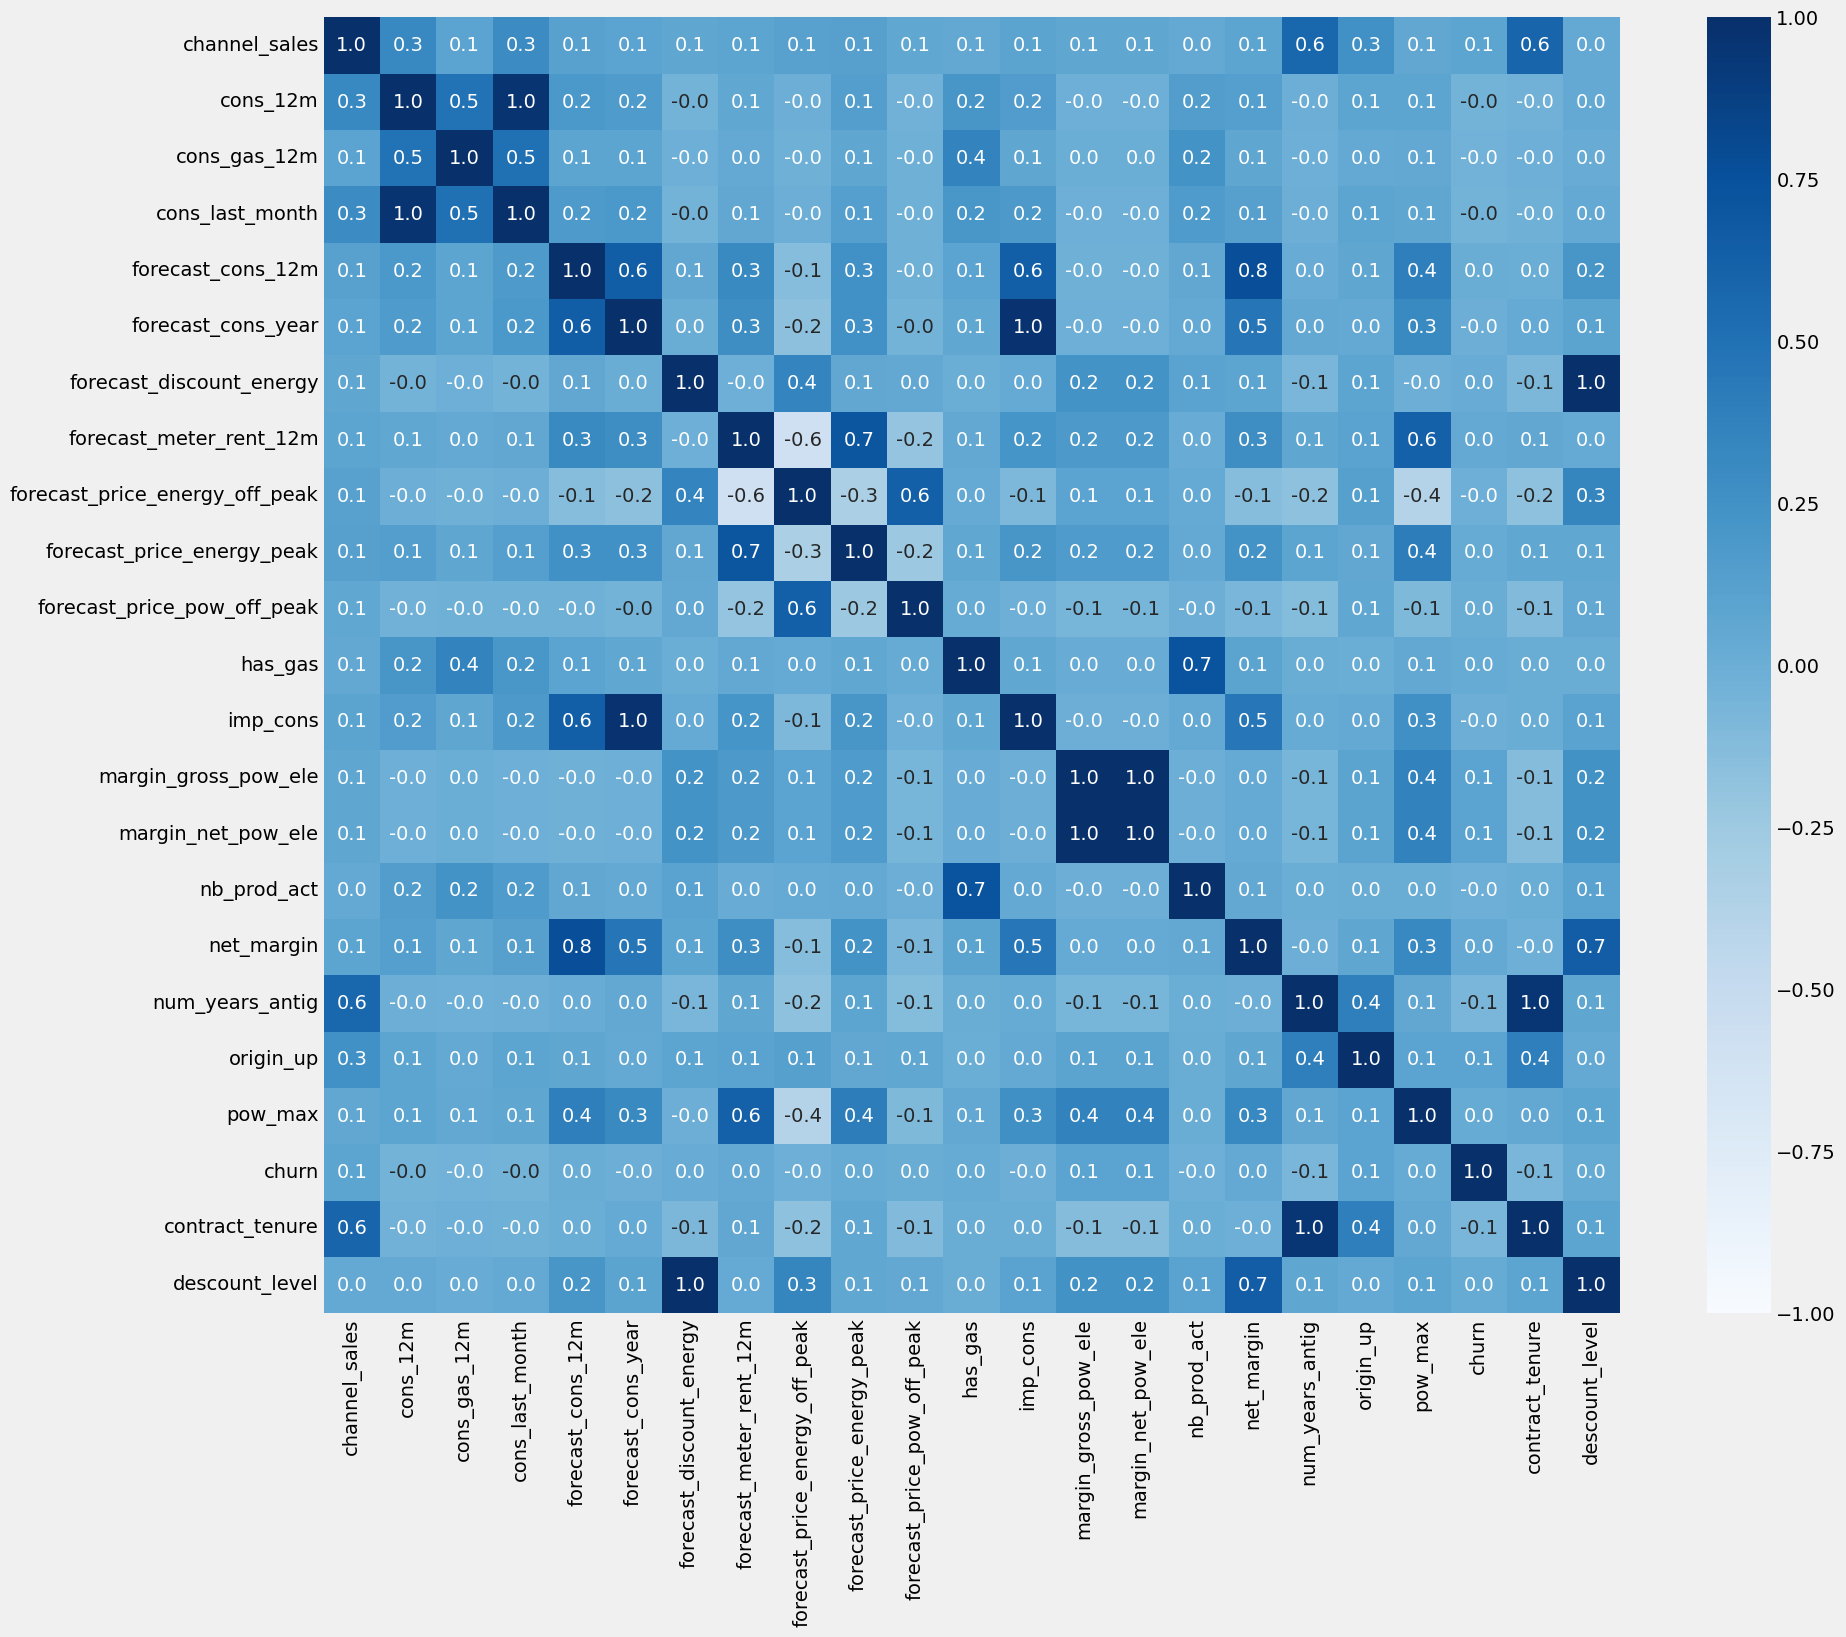

In [44]:
associations(client_columns,filename='test.png',fmt='0.1f',figsize=(20,16),annot=True,cmap='Blues')
plt.show()

In [49]:
# prompt: corr of client datasets

corr = client.corr()
corr

,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,pow_max,churn,contract_tenure
cons_12m,1.000000,0.488474,0.968212,0.193947,0.167093,-0.043282,0.065268,-0.007748,0.145908,-0.026566,0.159711,-0.011926,-0.011905,0.154251,0.133614,-0.003565,0.082889,-0.045968,-0.024656
cons_gas_12m,0.488474,1.000000,0.507007,0.084359,0.080934,-0.012595,0.041393,-0.017684,0.074002,-0.020558,0.077846,0.006868,0.006852,0.239387,0.070867,-0.013815,0.054317,-0.037957,-0.013845
cons_last_month,0.968212,0.507007,1.000000,0.177773,0.193574,-0.040874,0.057476,-0.005187,0.136802,-0.023017,0.187034,-0.011498,-0.011477,0.169099,0.121835,-0.003677,0.074529,-0.045284,-0.022239
forecast_cons_12m,0.193947,0.084359,0.177773,1.000000,0.647727,0.058435,0.305627,-0.135646,0.254056,-0.018477,0.634600,-0.023220,-0.023231,0.055915,0.768537,0.021283,0.393946,0.012949,0.005286
forecast_cons_year,0.167093,0.080934,0.193574,0.647727,1.000000,0.008518,0.276009,-0.158012,0.251005,-0.044190,0.969395,-0.010759,-0.010727,0.040426,0.464928,0.048248,0.309647,-0.002558,0.032547
forecast_discount_energy,-0.043282,-0.012595,-0.040874,0.058435,0.008518,1.000000,-0.008388,0.353735,0.059318,0.048024,0.037939,0.241142,0.240421,0.106812,0.079784,-0.070697,-0.005032,0.017026,-0.079610
forecast_meter_rent_12m,0.065268,0.041393,0.057476,0.305627,0.276009,-0.008388,1.000000,-0.579353,0.706376,-0.203089,0.224212,0.183509,0.183566,0.018109,0.275830,0.071558,0.618549,0.044245,0.061411
forecast_price_energy_off_peak,-0.007748,-0.017684,-0.005187,-0.135646,-0.158012,0.353735,-0.579353,1.000000,-0.330138,0.630377,-0.092535,0.094498,0.094216,0.035093,-0.135107,-0.168095,-0.384397,-0.010837,-0.165340
forecast_price_energy_peak,0.145908,0.074002,0.136802,0.254056,0.251005,0.059318,0.706376,-0.330138,1.000000,-0.242017,0.212317,0.165483,0.165560,0.044141,0.234942,0.080260,0.411532,0.029315,0.067358
forecast_price_pow_off_peak,-0.026566,-0.020558,-0.023017,-0.018477,-0.044190,0.048024,-0.203089,0.630377,-0.242017,1.000000,-0.011318,-0.061869,-0.061925,-0.005335,-0.072623,-0.120136,-0.095897,0.014778,-0.105936


In [ ]:
# save the csv_file
client.to_csv('../data/processed/client_clean.csv')